# pol x

In [1]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_pol.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (1000, 48)
Training labels shape: (1000,)
Validation embeddings shape: (400, 48)
Validation labels shape: (400,)


In [2]:
import torch
import numpy as np

# Chuyển dữ liệu sang torch.Tensor nếu cần
x_embeddings = torch.tensor(x_embeddings, dtype=torch.float32) if not isinstance(x_embeddings, torch.Tensor) else x_embeddings
xt_embeddings = torch.tensor(xt_embeddings, dtype=torch.float32) if not isinstance(xt_embeddings, torch.Tensor) else xt_embeddings

# Tính giá trị trung bình và độ lệch chuẩn từ X_train
mean = x_embeddings.mean(dim=0)  # Trung bình theo từng cột (feature)
std = x_embeddings.std(dim=0)    # Độ lệch chuẩn theo từng cột (feature)

# Đảm bảo std không có giá trị 0 để tránh chia cho 0
std[std == 0] = 1e-8

# Chuẩn hóa dữ liệu
X_train_normalized = (x_embeddings - mean) / std
X_valid_normalized = (xt_embeddings - mean) / std

# In kết quả
print("After normalization:")
print(X_train_normalized.shape, X_valid_normalized.shape)

After normalization:
torch.Size([1000, 48]) torch.Size([400, 48])


In [32]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train_normalized.clone()
X_valid_copy = X_valid_normalized.clone()
param = add_gauss_noise(X_copy, X_valid_copy, noise_rate=0.2, mu=0, sigma=2)
X_train_normalized_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_normalized_noisy.shape)
# train model logistic regression
input_dim = X_train_normalized_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_normalized_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(X_valid_normalized)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: torch.Size([1000, 48])
Accuracy: 0.9123106160664495


Running evaluator: KNNEvaluator0


100%|██████████| 999/999 [00:00<00:00, 3649.72it/s]


KNNEvaluator0 completed in 1.00 seconds.
Running evaluator: CKNNEvaluator1


100%|██████████| 800/800 [00:00<00:00, 4210.03it/s]


CKNNEvaluator1 completed in 0.31 seconds.
Running evaluator: LavaEvaluator_batch2


batch LAVA:   0%|          | 0/5 [00:00<?, ?it/s]











batch LAVA:  20%|██        | 1/5 [00:00<00:00,  9.66it/s]











batch LAVA:  40%|████      | 2/5 [00:09<00:17,  5.81s/it]











batch LAVA:  60%|██████    | 3/5 [00:10<00:06,  3.20s/it]











batch LAVA:  80%|████████  | 4/5 [00:10<00:01,  1.98s/it]











batch LAVA: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


LavaEvaluator_batch2 completed in 10.22 seconds.
Running evaluator: LavaEvaluator_batchl2l3


batch LAVA: 100%|██████████| 5/5 [00:00<00:00, 47.84it/s]


LavaEvaluator_batchl2l3 completed in 0.18 seconds.
Running evaluator: LavaEvaluator_OT4


LavaEvaluator_OT4 completed in 0.20 seconds.
Running evaluator: LavaEvaluator_geomloss5


LavaEvaluator_geomloss5 completed in 0.10 seconds.


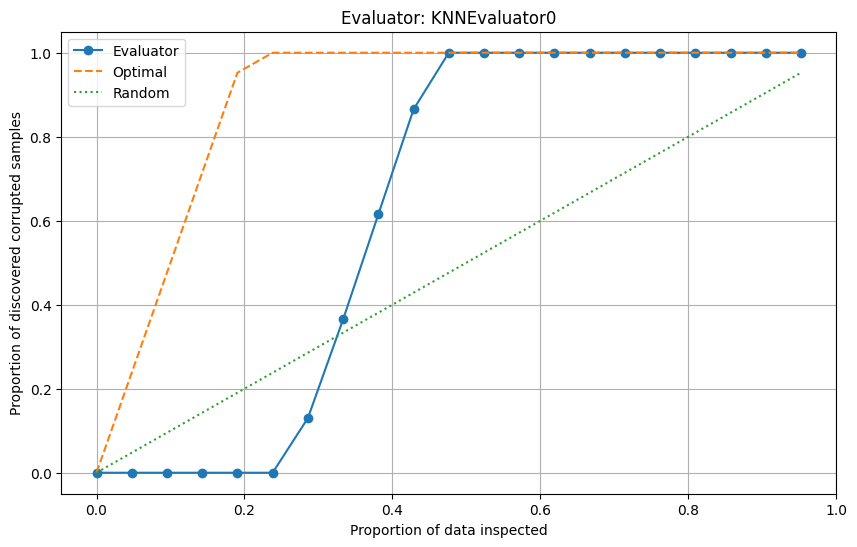

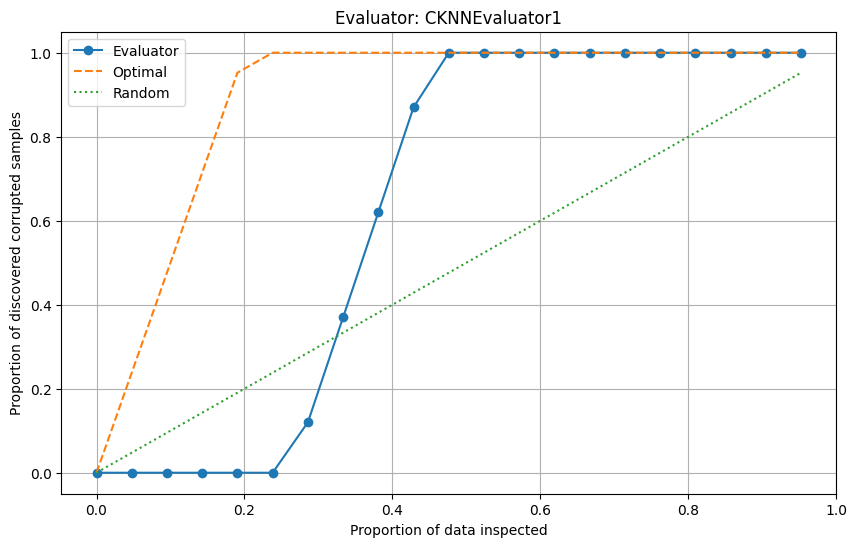

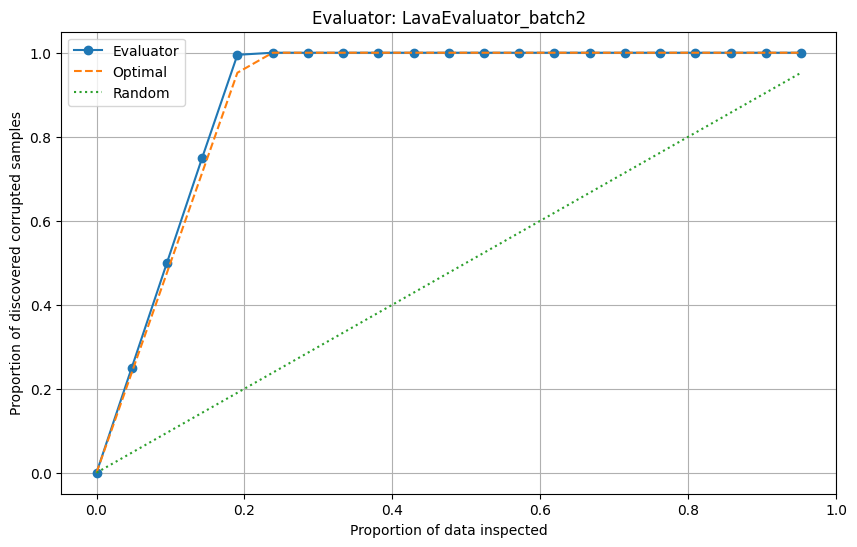

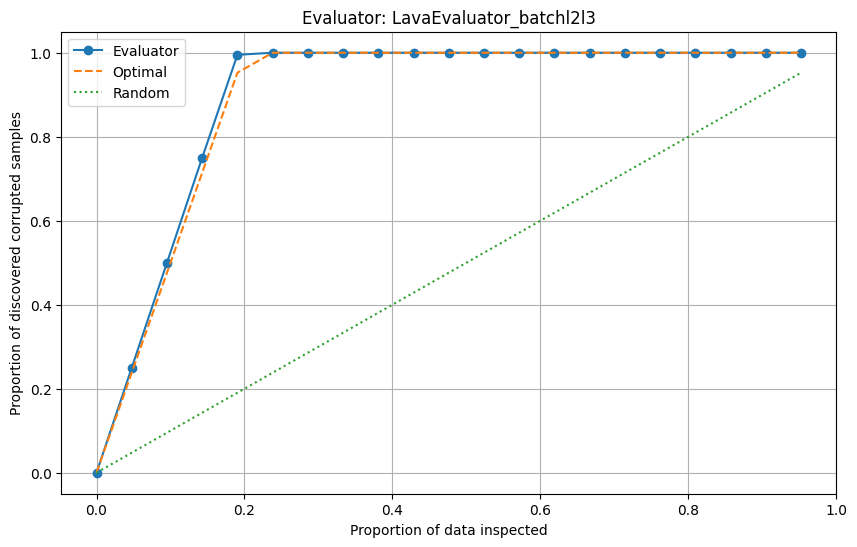

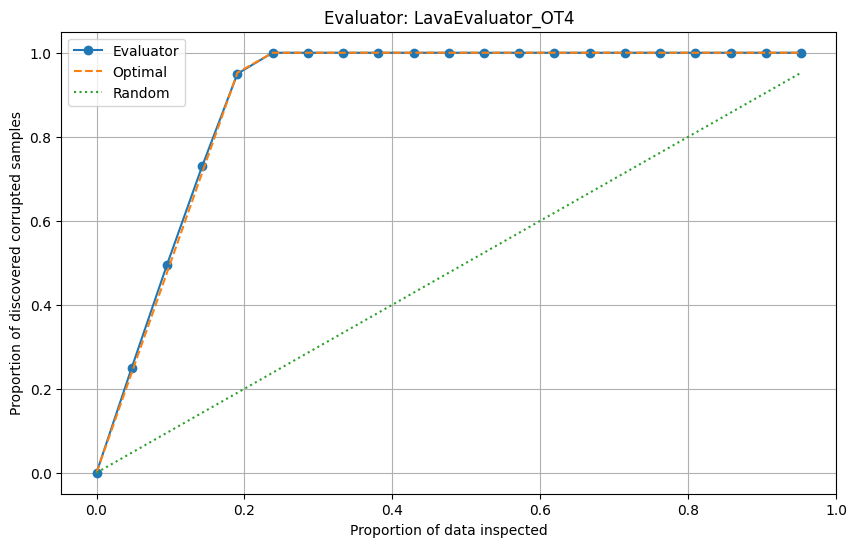

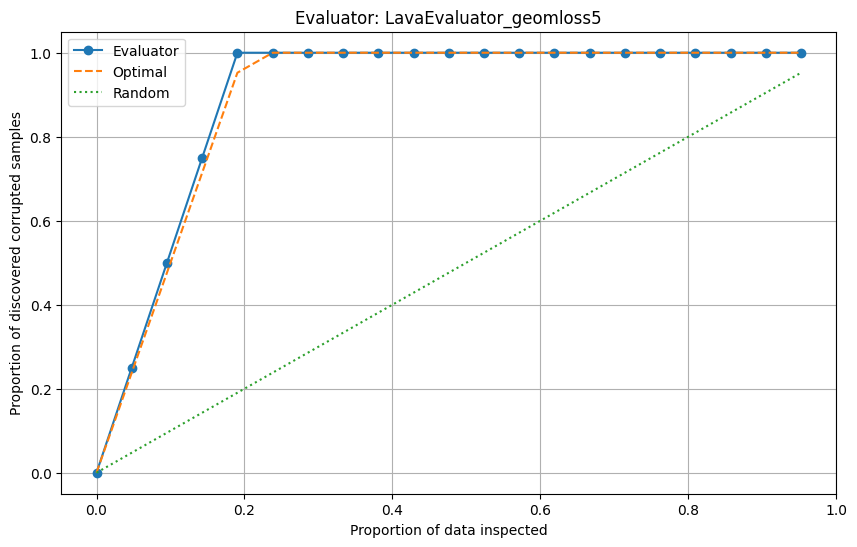

{'KNNEvaluator0': {'found_rates': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.13,
   0.365,
   0.615,
   0.865,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'CKNNEvaluator1': {'found_rates': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.12,
   0.37,
   0.62,
   0.87,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047

In [35]:
from base_evaluator import BaseEvaluator, KNNEvaluator,CKNNEvaluator ,LavaEvaluator_geomloss, LavaEvaluator_OT, ExperimentRunner, LavaEvaluator_batch, LavaEvaluator_batchl2l
knn_evaluator1 = KNNEvaluator(Ismetric=0)
cknn_evaluator2 = CKNNEvaluator(T = 200, default=False)
lava_evaluator_batch1 = LavaEvaluator_batch(batch = 200)
lava_evaluator_batchl2l = LavaEvaluator_batchl2l(batch = 200)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()
experiment = ExperimentRunner(evaluators=[knn_evaluator1, cknn_evaluator2, lava_evaluator_batch1, lava_evaluator_batchl2l, lava_evaluator_OT, lava_evaluator_geomloss])
results = experiment.run(X_train_normalized_noisy, y_labels, X_valid_normalized, yt_labels)
experiment.evaluate(noisy_train_indices)

In [36]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.2)

KNNEvaluator0: {'F1-model': np.float64(0.8554635545202236), 'Precision': 0.0, 'Recall': 0.0, 'F1-Score': 0}
CKNNEvaluator1: {'F1-model': np.float64(0.8554635545202236), 'Precision': 0.0, 'Recall': 0.0, 'F1-Score': 0}
LavaEvaluator_batch2: {'F1-model': np.float64(0.9010909090909092), 'Precision': 0.995, 'Recall': 0.995, 'F1-Score': 0.995}
LavaEvaluator_batchl2l3: {'F1-model': np.float64(0.9010909090909092), 'Precision': 0.995, 'Recall': 0.995, 'F1-Score': 0.995}
LavaEvaluator_OT4: {'F1-model': np.float64(0.9037893862200161), 'Precision': 0.95, 'Recall': 0.95, 'F1-Score': 0.9500000000000001}
LavaEvaluator_geomloss5: {'F1-model': np.float64(0.9010909090909092), 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


{'KNNEvaluator0': {'F1-model': np.float64(0.8554635545202236),
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-Score': 0},
 'CKNNEvaluator1': {'F1-model': np.float64(0.8554635545202236),
  'Precision': 0.0,
  'Recall': 0.0,
  'F1-Score': 0},
 'LavaEvaluator_batch2': {'F1-model': np.float64(0.9010909090909092),
  'Precision': 0.995,
  'Recall': 0.995,
  'F1-Score': 0.995},
 'LavaEvaluator_batchl2l3': {'F1-model': np.float64(0.9010909090909092),
  'Precision': 0.995,
  'Recall': 0.995,
  'F1-Score': 0.995},
 'LavaEvaluator_OT4': {'F1-model': np.float64(0.9037893862200161),
  'Precision': 0.95,
  'Recall': 0.95,
  'F1-Score': 0.9500000000000001},
 'LavaEvaluator_geomloss5': {'F1-model': np.float64(0.9010909090909092),
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0}}

In [37]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.3)

KNNEvaluator0: {'F1-model': np.float64(0.8414561167629069), 'Precision': 0.08666666666666667, 'Recall': 0.13, 'F1-Score': 0.10400000000000001}
CKNNEvaluator1: {'F1-model': np.float64(0.8485024154589372), 'Precision': 0.08, 'Recall': 0.12, 'F1-Score': 0.09599999999999999}
LavaEvaluator_batch2: {'F1-model': np.float64(0.8984027460286359), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_batchl2l3: {'F1-model': np.float64(0.9010909090909092), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_OT4: {'F1-model': np.float64(0.9010909090909092), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_geomloss5: {'F1-model': np.float64(0.9010909090909092), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}


{'KNNEvaluator0': {'F1-model': np.float64(0.8414561167629069),
  'Precision': 0.08666666666666667,
  'Recall': 0.13,
  'F1-Score': 0.10400000000000001},
 'CKNNEvaluator1': {'F1-model': np.float64(0.8485024154589372),
  'Precision': 0.08,
  'Recall': 0.12,
  'F1-Score': 0.09599999999999999},
 'LavaEvaluator_batch2': {'F1-model': np.float64(0.8984027460286359),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_batchl2l3': {'F1-model': np.float64(0.9010909090909092),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_OT4': {'F1-model': np.float64(0.9010909090909092),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_geomloss5': {'F1-model': np.float64(0.9010909090909092),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8}}

In [ ]:
from experiment_run import run_experiments
seed = 20
np.random.seed(seed)
rand_lst = []
shap_list = [value for value in results.values()]
rand_lst.append(np.random.rand(len(shap_list[0])))
name = ['knn' , 'tknn', 'lava_batch', 'lava_batchl2l', 'lava_OT', 'lava_geomloss', 'random']
model = LogisticRegression(input_dim, num_classes)
values = [shap_list[1], shap_list[2], shap_list[3] , shap_list[4], shap_list[5], shap_list[6], rand_lst[0]]
run_experiments(values, name, x_embeddings, y_labels_noisy, xt_embeddings, yt_labels, model, plot_every_percentage=0.2)

Running remove_low experiment...
position: 0
position: 180
position: 360
position: 540
position: 720


# pol y

In [38]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_pol.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (1000, 48)
Training labels shape: (1000,)
Validation embeddings shape: (400, 48)
Validation labels shape: (400,)


In [39]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_labels.copy()
yt_copy = yt_labels.copy()
param = mix_label(y_copy, yt_copy, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

400
Noisy training labels shape: (1000,)
Accuracy: 0.8836489400947813


Running evaluator: TKNNEvaluator0
tau in tnn shapley 0.1


100%|██████████| 400/400 [00:02<00:00, 192.20it/s]


TKNNEvaluator0 completed in 2.11 seconds.
Running evaluator: KNNEvaluator1


100%|██████████| 999/999 [00:00<00:00, 4313.55it/s]


KNNEvaluator1 completed in 0.38 seconds.
Running evaluator: KNNEvaluator2


100%|██████████| 999/999 [00:00<00:00, 4077.01it/s]


KNNEvaluator2 completed in 0.36 seconds.
Running evaluator: CKNNEvaluator3


100%|██████████| 500/500 [00:00<00:00, 4217.26it/s]


CKNNEvaluator3 completed in 0.27 seconds.
Running evaluator: LavaEvaluator_batch4


batch LAVA:   0%|          | 0/5 [00:00<?, ?it/s]











batch LAVA:  20%|██        | 1/5 [00:00<00:00,  6.19it/s]











batch LAVA:  40%|████      | 2/5 [00:00<00:00,  7.42it/s]











batch LAVA:  60%|██████    | 3/5 [00:00<00:00,  8.12it/s]











batch LAVA:  80%|████████  | 4/5 [00:00<00:00,  8.54it/s]











batch LAVA: 100%|██████████| 5/5 [00:00<00:00,  8.25it/s]


LavaEvaluator_batch4 completed in 0.62 seconds.
Running evaluator: LavaEvaluator_batchl2l5


batch LAVA: 100%|██████████| 5/5 [00:00<00:00, 34.71it/s]


LavaEvaluator_batchl2l5 completed in 0.29 seconds.
Running evaluator: LavaEvaluator_OT6


d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


LavaEvaluator_OT6 completed in 0.30 seconds.
Running evaluator: LavaEvaluator_geomloss7


LavaEvaluator_geomloss7 completed in 0.10 seconds.


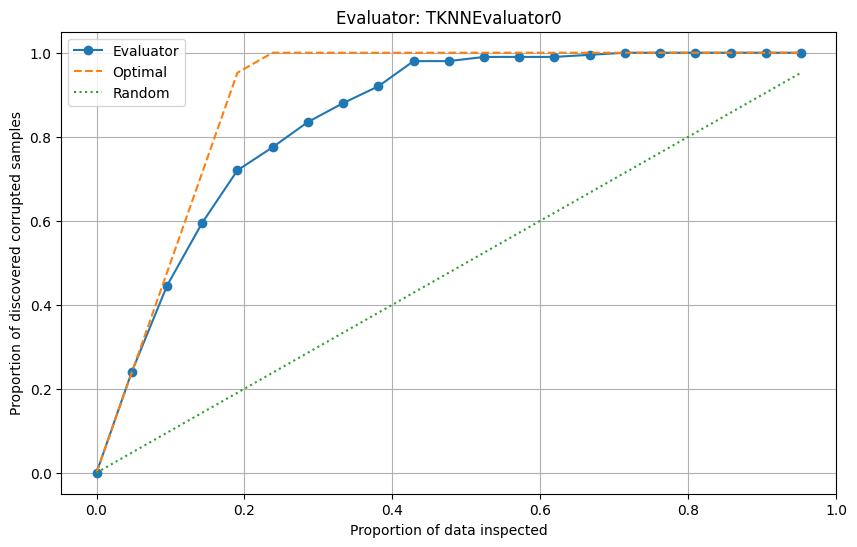

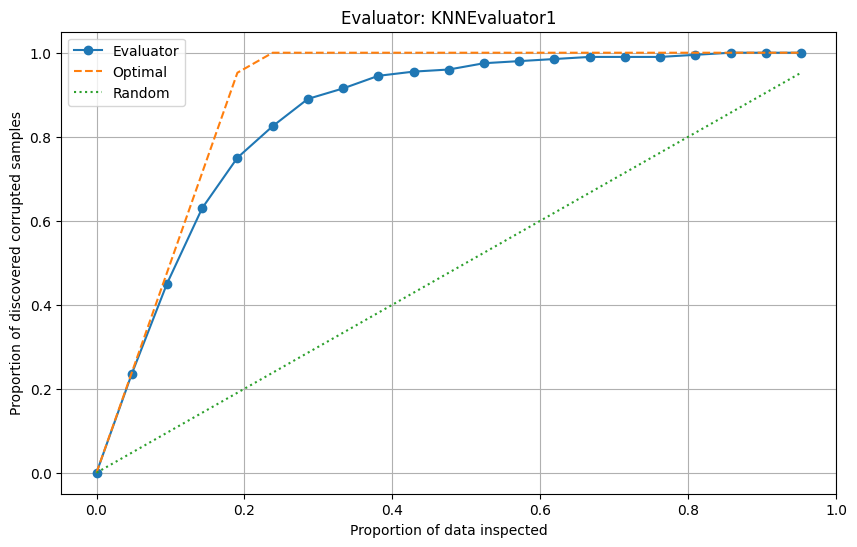

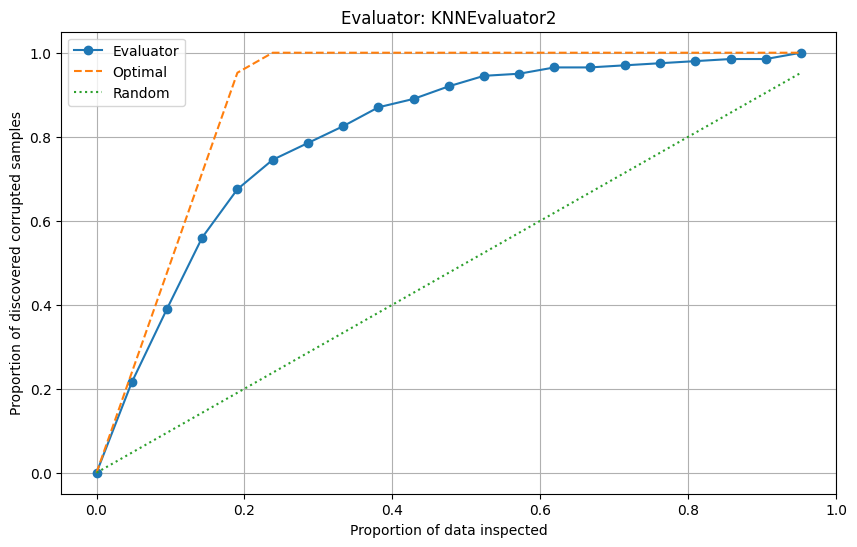

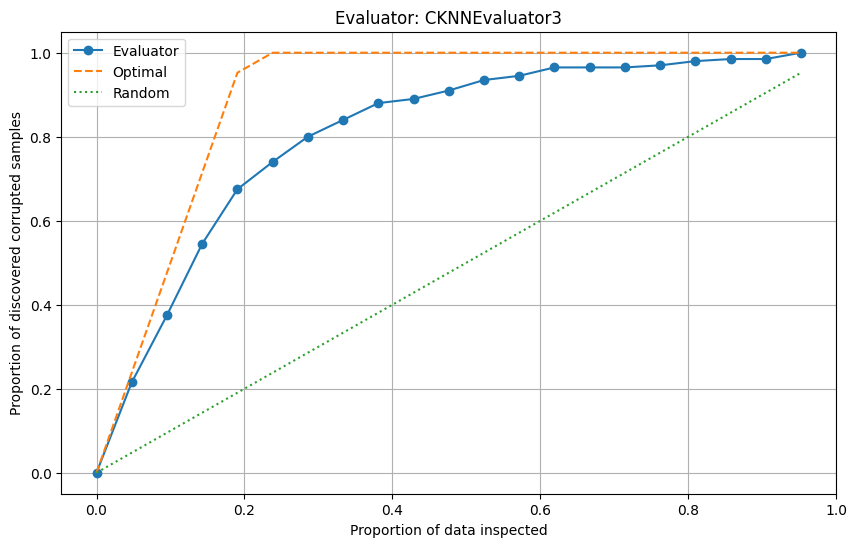

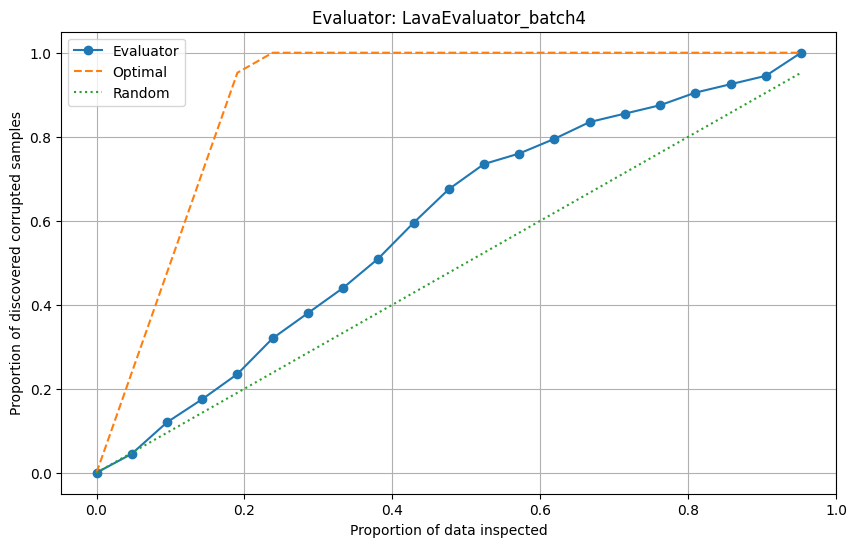

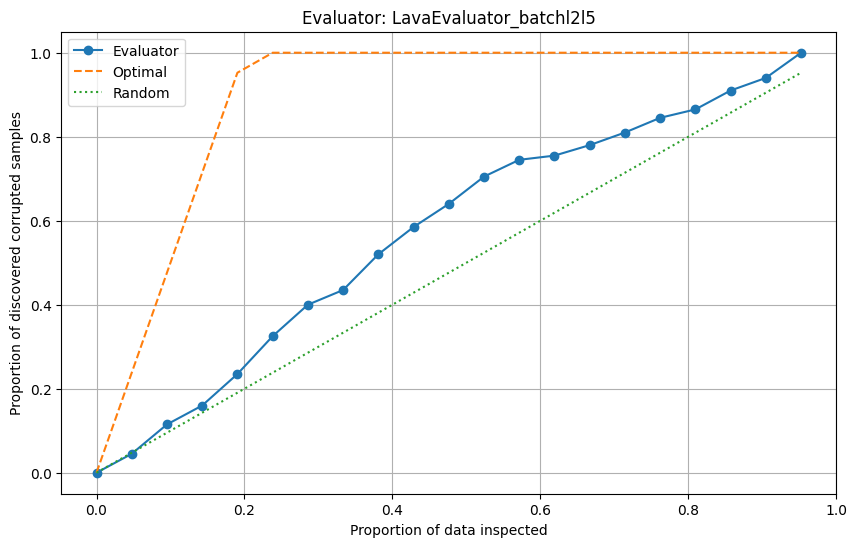

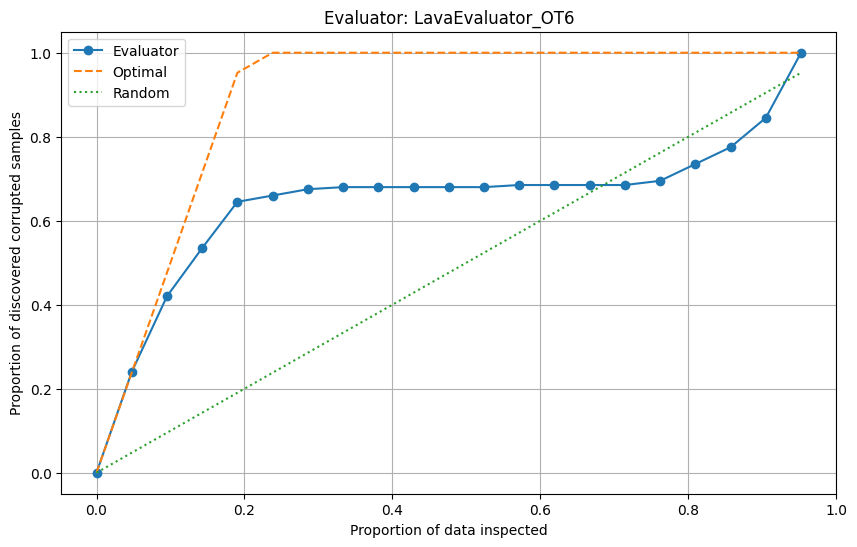

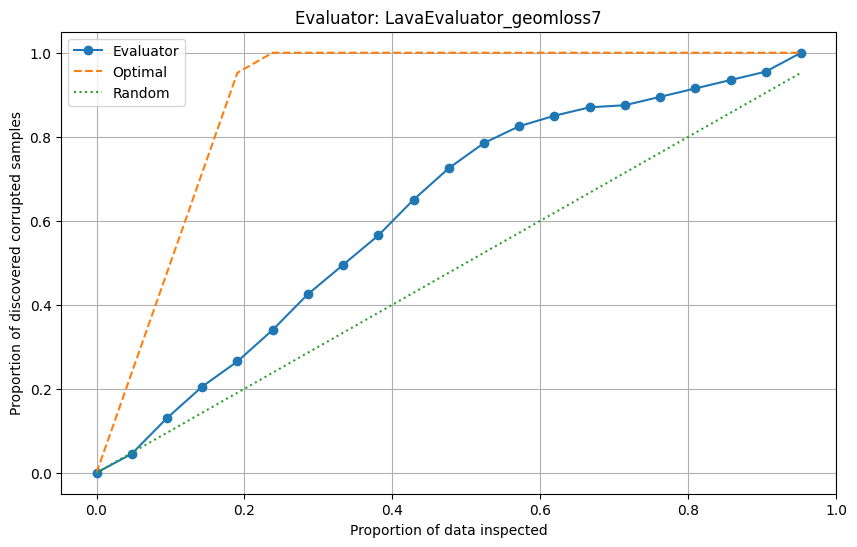

{'TKNNEvaluator0': {'found_rates': [0.0,
   0.24,
   0.445,
   0.595,
   0.72,
   0.775,
   0.835,
   0.88,
   0.92,
   0.98,
   0.98,
   0.99,
   0.99,
   0.99,
   0.995,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'KNNEvaluator1': {'found_rates': [0.0,
   0.235,
   0.45,
   0.63,
   0.75,
   0.825,
   0.89,
   0.915,
   0.945,
   0.955,
   0.96,
   0.975,
   0.98,
   0.985,
   0.99,
   0.99,
   0.99,
   0.995,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
 

In [40]:
from base_evaluator import BaseEvaluator, KNNEvaluator,CKNNEvaluator ,LavaEvaluator_geomloss, LavaEvaluator_OT, ExperimentRunner, LavaEvaluator_batch, LavaEvaluator_batchl2l, TKNNEvaluator
tknn_evaluator = TKNNEvaluator(T = 0.1)
knn_evaluator = KNNEvaluator(Ismetric=1)
knn_evaluator1 = KNNEvaluator(Ismetric=0)
cknn_evaluator2 = CKNNEvaluator(T = 500, default=False)
lava_evaluator_batch1 = LavaEvaluator_batch(batch = 200)
lava_evaluator_batchl2l = LavaEvaluator_batchl2l(batch = 200)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()
experiment = ExperimentRunner(evaluators=[tknn_evaluator, knn_evaluator, knn_evaluator1, cknn_evaluator2, lava_evaluator_batch1, lava_evaluator_batchl2l, lava_evaluator_OT, lava_evaluator_geomloss])
results = experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [41]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.2) # newww

TKNNEvaluator0: {'F1-model': np.float64(0.8710148977793064), 'Precision': 0.72, 'Recall': 0.72, 'F1-Score': 0.72}
KNNEvaluator1: {'F1-model': np.float64(0.8889668069191211), 'Precision': 0.75, 'Recall': 0.75, 'F1-Score': 0.75}
KNNEvaluator2: {'F1-model': np.float64(0.8831229546517064), 'Precision': 0.675, 'Recall': 0.675, 'F1-Score': 0.675}
CKNNEvaluator3: {'F1-model': np.float64(0.8825981039593789), 'Precision': 0.675, 'Recall': 0.675, 'F1-Score': 0.675}
LavaEvaluator_batch4: {'F1-model': np.float64(0.8648306158655065), 'Precision': 0.235, 'Recall': 0.235, 'F1-Score': 0.235}
LavaEvaluator_batchl2l5: {'F1-model': np.float64(0.8673955210721214), 'Precision': 0.235, 'Recall': 0.235, 'F1-Score': 0.235}
LavaEvaluator_OT6: {'F1-model': np.float64(0.8889668069191211), 'Precision': 0.645, 'Recall': 0.645, 'F1-Score': 0.645}
LavaEvaluator_geomloss7: {'F1-model': np.float64(0.8673955210721214), 'Precision': 0.265, 'Recall': 0.265, 'F1-Score': 0.265}


{'TKNNEvaluator0': {'F1-model': np.float64(0.8710148977793064),
  'Precision': 0.72,
  'Recall': 0.72,
  'F1-Score': 0.72},
 'KNNEvaluator1': {'F1-model': np.float64(0.8889668069191211),
  'Precision': 0.75,
  'Recall': 0.75,
  'F1-Score': 0.75},
 'KNNEvaluator2': {'F1-model': np.float64(0.8831229546517064),
  'Precision': 0.675,
  'Recall': 0.675,
  'F1-Score': 0.675},
 'CKNNEvaluator3': {'F1-model': np.float64(0.8825981039593789),
  'Precision': 0.675,
  'Recall': 0.675,
  'F1-Score': 0.675},
 'LavaEvaluator_batch4': {'F1-model': np.float64(0.8648306158655065),
  'Precision': 0.235,
  'Recall': 0.235,
  'F1-Score': 0.235},
 'LavaEvaluator_batchl2l5': {'F1-model': np.float64(0.8673955210721214),
  'Precision': 0.235,
  'Recall': 0.235,
  'F1-Score': 0.235},
 'LavaEvaluator_OT6': {'F1-model': np.float64(0.8889668069191211),
  'Precision': 0.645,
  'Recall': 0.645,
  'F1-Score': 0.645},
 'LavaEvaluator_geomloss7': {'F1-model': np.float64(0.8673955210721214),
  'Precision': 0.265,
  'Rec

In [42]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.3) # newwave

TKNNEvaluator0: {'F1-model': np.float64(0.8736213235294117), 'Precision': 0.5733333333333334, 'Recall': 0.86, 'F1-Score': 0.6880000000000001}
KNNEvaluator1: {'F1-model': np.float64(0.878833551285177), 'Precision': 0.5933333333333334, 'Recall': 0.89, 'F1-Score': 0.712}
KNNEvaluator2: {'F1-model': np.float64(0.8317515429148281), 'Precision': 0.5233333333333333, 'Recall': 0.785, 'F1-Score': 0.628}
CKNNEvaluator3: {'F1-model': np.float64(0.8387084503077473), 'Precision': 0.5333333333333333, 'Recall': 0.8, 'F1-Score': 0.64}
LavaEvaluator_batch4: {'F1-model': np.float64(0.8648306158655065), 'Precision': 0.25333333333333335, 'Recall': 0.38, 'F1-Score': 0.30400000000000005}
LavaEvaluator_batchl2l5: {'F1-model': np.float64(0.8751383410425948), 'Precision': 0.26666666666666666, 'Recall': 0.4, 'F1-Score': 0.32}
LavaEvaluator_OT6: {'F1-model': np.float64(0.8466445834866887), 'Precision': 0.45, 'Recall': 0.675, 'F1-Score': 0.54}
LavaEvaluator_geomloss7: {'F1-model': np.float64(0.8668847490989939), 

{'TKNNEvaluator0': {'F1-model': np.float64(0.8736213235294117),
  'Precision': 0.5733333333333334,
  'Recall': 0.86,
  'F1-Score': 0.6880000000000001},
 'KNNEvaluator1': {'F1-model': np.float64(0.878833551285177),
  'Precision': 0.5933333333333334,
  'Recall': 0.89,
  'F1-Score': 0.712},
 'KNNEvaluator2': {'F1-model': np.float64(0.8317515429148281),
  'Precision': 0.5233333333333333,
  'Recall': 0.785,
  'F1-Score': 0.628},
 'CKNNEvaluator3': {'F1-model': np.float64(0.8387084503077473),
  'Precision': 0.5333333333333333,
  'Recall': 0.8,
  'F1-Score': 0.64},
 'LavaEvaluator_batch4': {'F1-model': np.float64(0.8648306158655065),
  'Precision': 0.25333333333333335,
  'Recall': 0.38,
  'F1-Score': 0.30400000000000005},
 'LavaEvaluator_batchl2l5': {'F1-model': np.float64(0.8751383410425948),
  'Precision': 0.26666666666666666,
  'Recall': 0.4,
  'F1-Score': 0.32},
 'LavaEvaluator_OT6': {'F1-model': np.float64(0.8466445834866887),
  'Precision': 0.45,
  'Recall': 0.675,
  'F1-Score': 0.54},


Running remove_low experiment...
position: 0
position: 180
position: 360
position: 540
position: 720


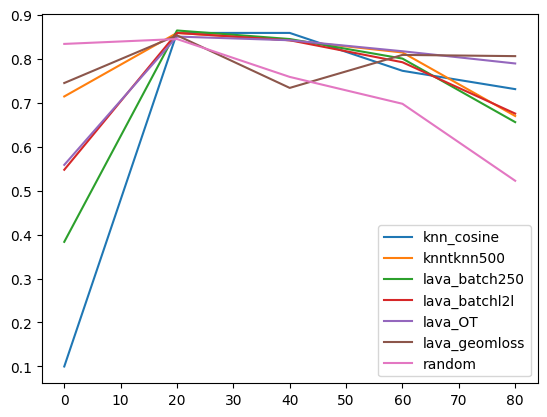

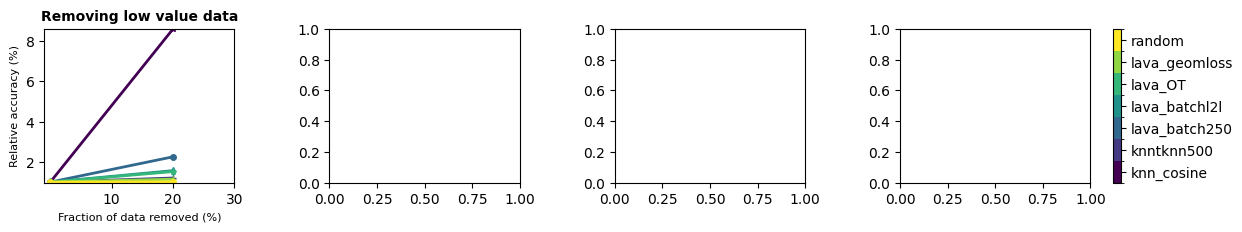

In [ ]:
from experiment_run import run_experiments
seed = 20
np.random.seed(seed)
rand_lst = []
shap_list = [value for value in results.values()]
rand_lst.append(np.random.rand(len(shap_list[0])))
name = ['knn_cosine', 'knn' 'tknn500' , 'lava_batch250', 'lava_batchl2l', 'lava_OT', 'lava_geomloss', 'random']
model = LogisticRegression(input_dim, num_classes)
values = [shap_list[0], shap_list[1], shap_list[2], shap_list[3] , shap_list[4], shap_list[5], shap_list[6], rand_lst[0]]
run_experiments(values, name, x_embeddings, y_labels_noisy, xt_embeddings, yt_labels, model, plot_every_percentage=0.2)

# Fashion Mnist X

In [4]:
import os
import numpy as np
from tqdm import tqdm
#from operator import itemgetter
#from collections import OrderedDict

from PIL import Image
#import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import optim,nn
import torch.nn.functional as F
from torchvision import transforms as T,models
from torch.utils.data import Dataset, DataLoader, random_split
#from torchvision.utils import make_grid

#pd.options.plotting.backend = "plotly"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_fashion.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (2000, 2048)
Training labels shape: (2000,)
Validation embeddings shape: (1000, 2048)
Validation labels shape: (1000,)


In [6]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = x_embeddings.copy()
X_valid_copy = xt_embeddings.copy()
param = add_gauss_noise(X_copy, X_valid_copy, noise_rate=0.2, mu=0, sigma=2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: (2000, 2048)
Accuracy: 0.8565054400926898


Running evaluator: KNNEvaluator0


100%|██████████| 1999/1999 [00:00<00:00, 2295.55it/s]


KNNEvaluator0 completed in 1.92 seconds.
Running evaluator: KNNEvaluator1


100%|██████████| 1999/1999 [00:00<00:00, 2320.29it/s]


KNNEvaluator1 completed in 1.58 seconds.
Running evaluator: CKNNEvaluator2


100%|██████████| 1000/1000 [00:00<00:00, 2440.68it/s]


CKNNEvaluator2 completed in 1.42 seconds.
Running evaluator: LavaEvaluator_batch3


batch LAVA:   0%|          | 0/4 [00:00<?, ?it/s]











d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(
batch LAVA:  25%|██▌       | 1/4 [00:00<00:01,  1.50it/s]











batch LAVA:  50%|█████     | 2/4 [00:01<00:01,  1.56it/s]











batch LAVA:  75%|███████▌  | 3/4 [00:01<00:00,  1.62it/s]











batch LAVA: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


LavaEvaluator_batch3 completed in 2.45 seconds.
Running evaluator: LavaEvaluator_batchl2l4


batch LAVA: 100%|██████████| 63/63 [03:25<00:00,  3.26s/it]


LavaEvaluator_batchl2l4 completed in 205.62 seconds.
Running evaluator: LavaEvaluator_batchl2l5


batch LAVA: 100%|██████████| 32/32 [00:59<00:00,  1.85s/it]


LavaEvaluator_batchl2l5 completed in 59.62 seconds.
Running evaluator: LavaEvaluator_batchl2l6


batch LAVA: 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]


LavaEvaluator_batchl2l6 completed in 18.22 seconds.
Running evaluator: LavaEvaluator_batchl2l7


batch LAVA: 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


LavaEvaluator_batchl2l7 completed in 4.75 seconds.
Running evaluator: LavaEvaluator_batchl2l8


batch LAVA: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]


LavaEvaluator_batchl2l8 completed in 1.91 seconds.
Running evaluator: LavaEvaluator_batchl2l9


batch LAVA: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


LavaEvaluator_batchl2l9 completed in 1.18 seconds.
Running evaluator: LavaEvaluator_OT10


LavaEvaluator_OT10 completed in 0.78 seconds.
Running evaluator: LavaEvaluator_geomloss11


LavaEvaluator_geomloss11 completed in 2.57 seconds.


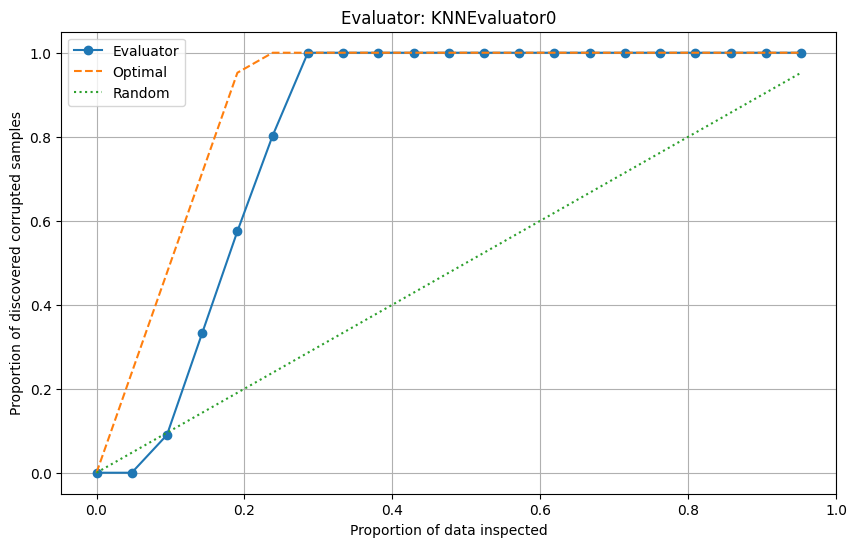

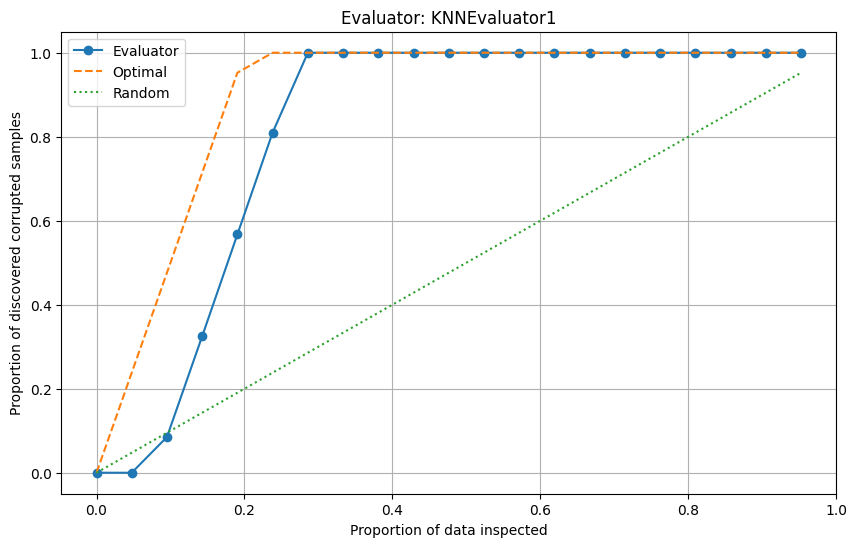

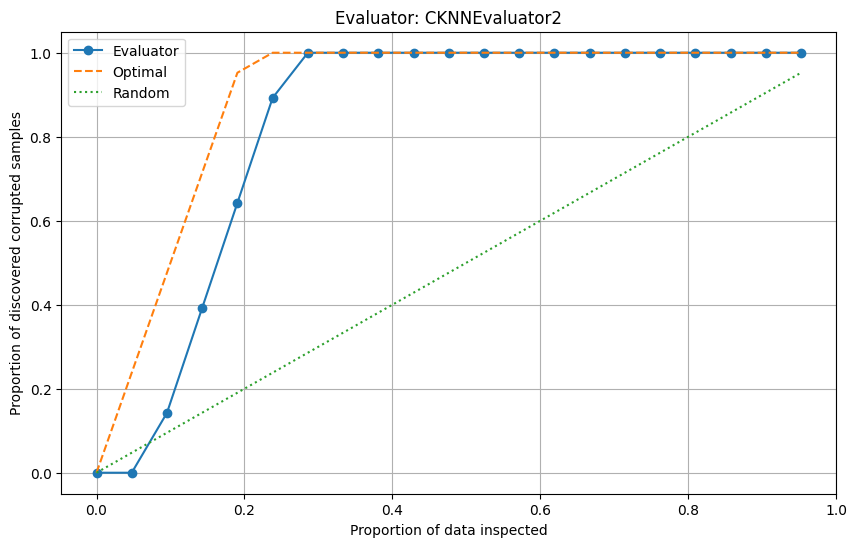

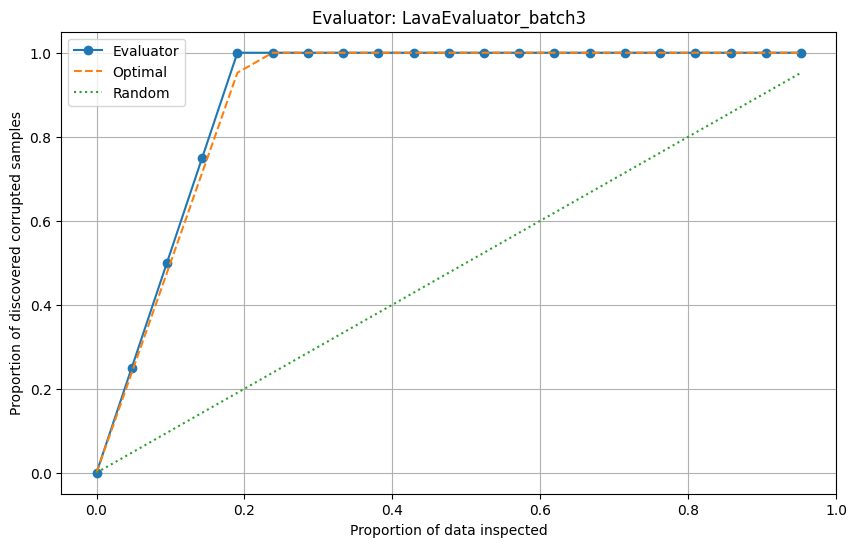

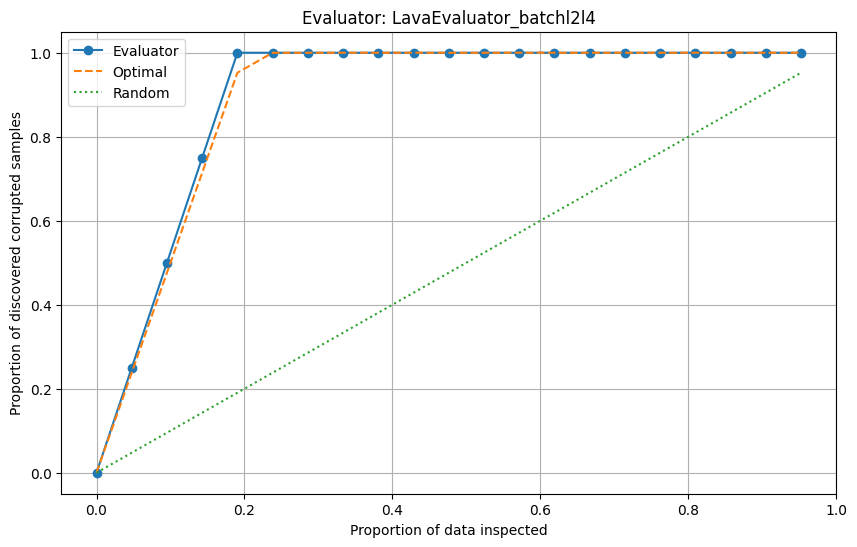

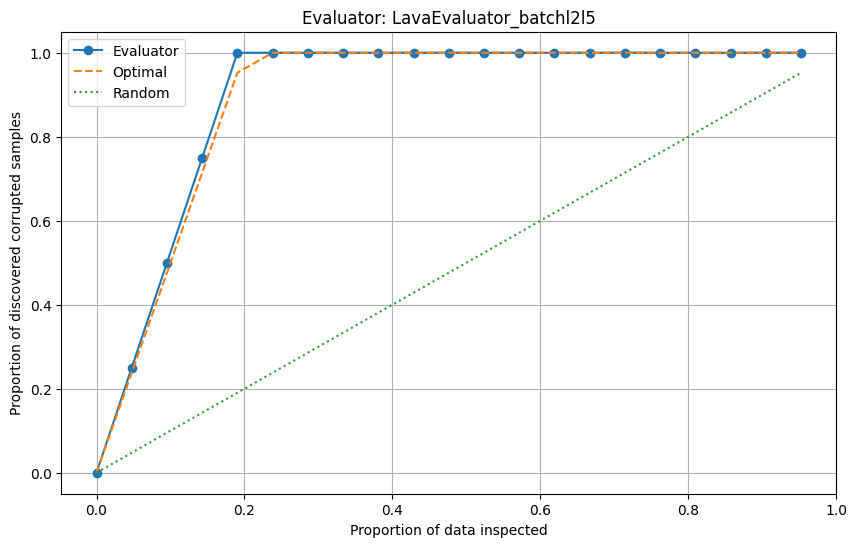

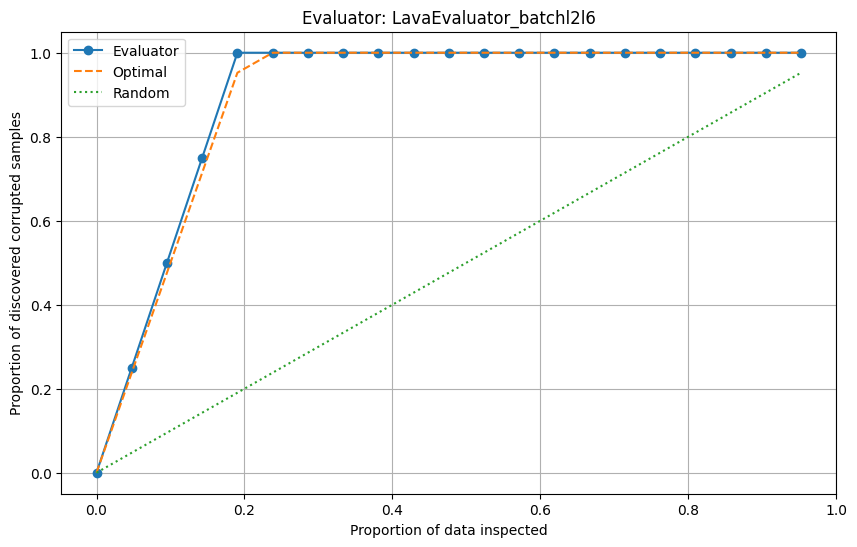

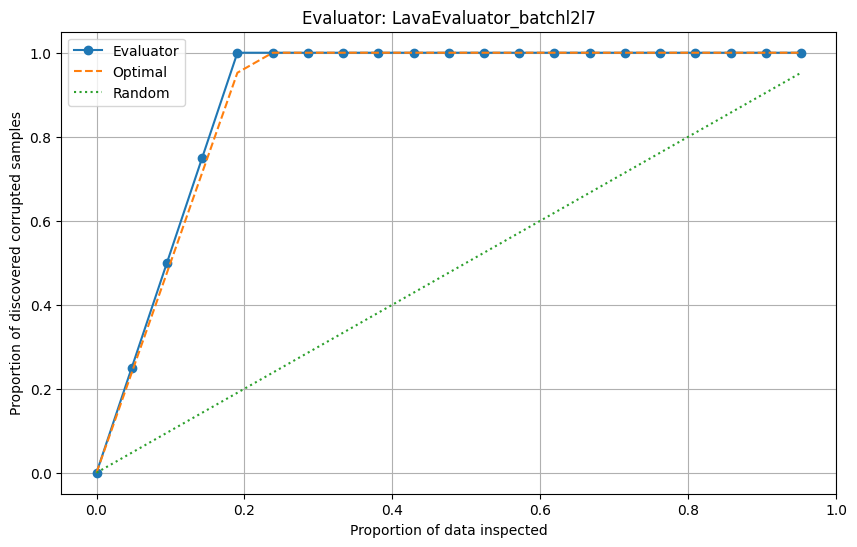

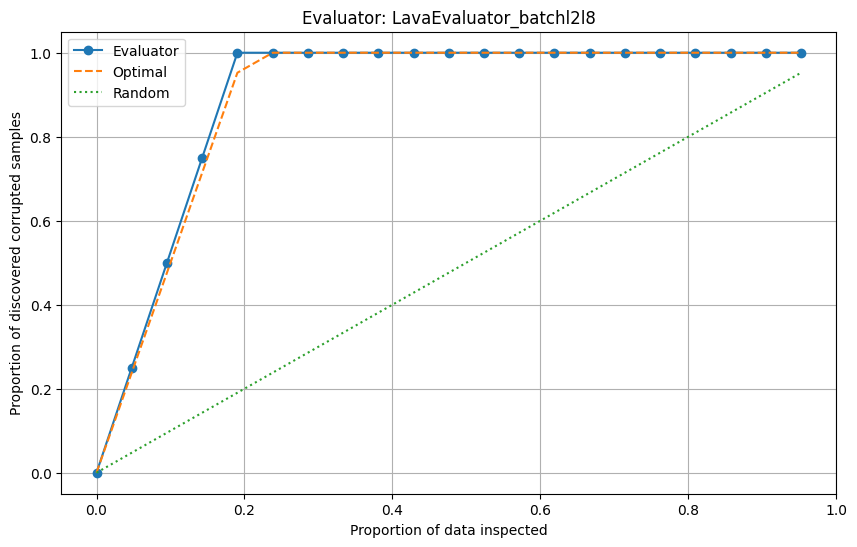

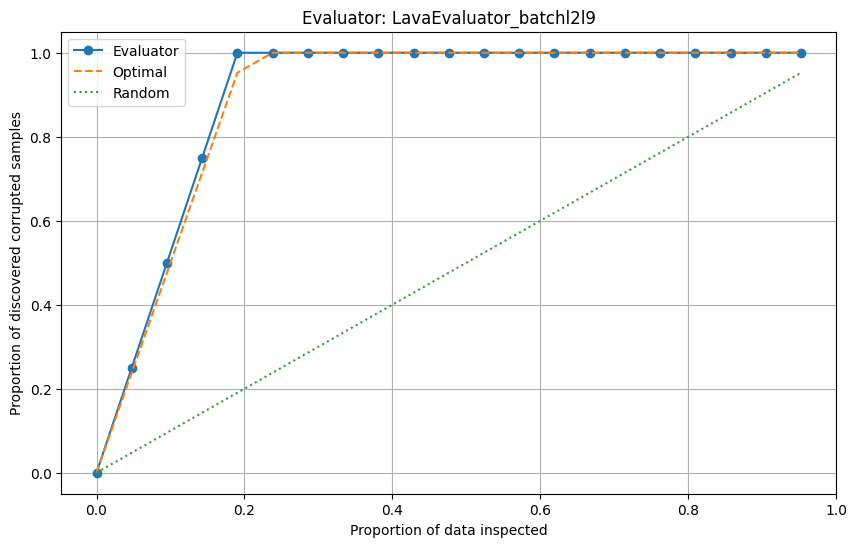

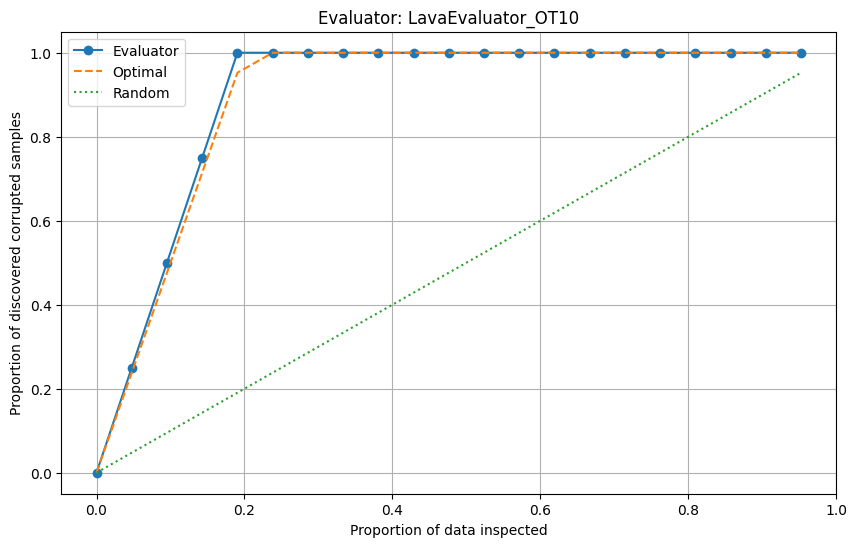

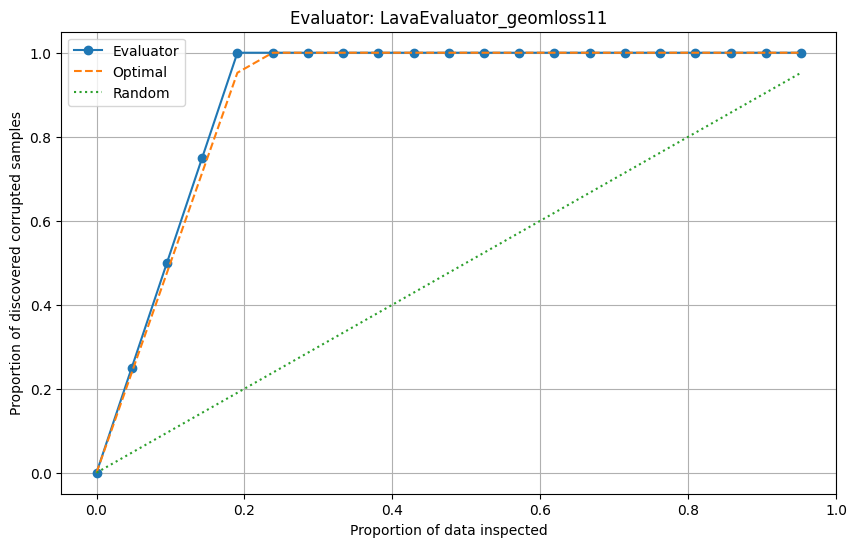

{'KNNEvaluator0': {'found_rates': [0.0,
   0.0,
   0.09,
   0.3325,
   0.575,
   0.8025,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'KNNEvaluator1': {'found_rates': [0.0,
   0.0,
   0.085,
   0.325,
   0.5675,
   0.81,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.

In [7]:
from base_evaluator import BaseEvaluator, KNNEvaluator,CKNNEvaluator ,LavaEvaluator_geomloss, LavaEvaluator_OT, ExperimentRunner, LavaEvaluator_batch, LavaEvaluator_batchl2l
knn_evaluator1 = KNNEvaluator(Ismetric=0)
knn_evaluator2 = KNNEvaluator(Ismetric=1)
cknn_evaluator2 = CKNNEvaluator(T = 1000, default=False)
lava_evaluator_batch1 = LavaEvaluator_batch(batch = 512)
lava_evaluator_batchl2l1 = LavaEvaluator_batchl2l(batch = 32)
lava_evaluator_batchl2l2 = LavaEvaluator_batchl2l(batch = 64)
lava_evaluator_batchl2l3 = LavaEvaluator_batchl2l(batch = 128)
lava_evaluator_batchl2l4 = LavaEvaluator_batchl2l(batch = 256)
lava_evaluator_batchl2l5 = LavaEvaluator_batchl2l(batch = 512)
lava_evaluator_batchl2l6 = LavaEvaluator_batchl2l(batch = 1024)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()
experiment = ExperimentRunner(evaluators=[knn_evaluator1, knn_evaluator2, cknn_evaluator2, lava_evaluator_batch1, lava_evaluator_batchl2l1, lava_evaluator_batchl2l2, lava_evaluator_batchl2l3, lava_evaluator_batchl2l4, lava_evaluator_batchl2l5, lava_evaluator_batchl2l6, lava_evaluator_OT, lava_evaluator_geomloss])
results = experiment.run(X_train_noisy, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [8]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.2)

KNNEvaluator0: {'F1-model': np.float64(0.8588930226848225), 'Precision': 0.575, 'Recall': 0.575, 'F1-Score': 0.575}
KNNEvaluator1: {'F1-model': np.float64(0.857368175624338), 'Precision': 0.5675, 'Recall': 0.5675, 'F1-Score': 0.5675}
CKNNEvaluator2: {'F1-model': np.float64(0.86008584556989), 'Precision': 0.6425, 'Recall': 0.6425, 'F1-Score': 0.6425}
LavaEvaluator_batch3: {'F1-model': np.float64(0.8595945627403714), 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
LavaEvaluator_batchl2l4: {'F1-model': np.float64(0.8595945627403714), 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
LavaEvaluator_batchl2l5: {'F1-model': np.float64(0.8595945627403714), 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
LavaEvaluator_batchl2l6: {'F1-model': np.float64(0.8595945627403714), 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
LavaEvaluator_batchl2l7: {'F1-model': np.float64(0.8595945627403714), 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}
LavaEvaluator_batchl2l8: {'F1-model': np.float64(0.

{'KNNEvaluator0': {'F1-model': np.float64(0.8588930226848225),
  'Precision': 0.575,
  'Recall': 0.575,
  'F1-Score': 0.575},
 'KNNEvaluator1': {'F1-model': np.float64(0.857368175624338),
  'Precision': 0.5675,
  'Recall': 0.5675,
  'F1-Score': 0.5675},
 'CKNNEvaluator2': {'F1-model': np.float64(0.86008584556989),
  'Precision': 0.6425,
  'Recall': 0.6425,
  'F1-Score': 0.6425},
 'LavaEvaluator_batch3': {'F1-model': np.float64(0.8595945627403714),
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0},
 'LavaEvaluator_batchl2l4': {'F1-model': np.float64(0.8595945627403714),
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0},
 'LavaEvaluator_batchl2l5': {'F1-model': np.float64(0.8595945627403714),
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0},
 'LavaEvaluator_batchl2l6': {'F1-model': np.float64(0.8595945627403714),
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0},
 'LavaEvaluator_batchl2l7': {'F1-model': np.float64(0.8595945627403714),
  'Precision': 1.0,
  'Recal

In [9]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.3)

KNNEvaluator0: {'F1-model': np.float64(0.8574706405612778), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
KNNEvaluator1: {'F1-model': np.float64(0.8558938386577433), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
CKNNEvaluator2: {'F1-model': np.float64(0.8585170508336942), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_batch3: {'F1-model': np.float64(0.8608249780644401), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_batchl2l4: {'F1-model': np.float64(0.8590075063246827), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_batchl2l5: {'F1-model': np.float64(0.8604534232948124), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_batchl2l6: {'F1-model': np.float64(0.8567032755657531), 'Precision': 0.6666666666666666, 'Recall': 1.0, 'F1-Score': 0.8}
LavaEvaluator_batchl2l7: {'F1-model': np.float64(0.8593566413208011), 'Precision': 0.66

{'KNNEvaluator0': {'F1-model': np.float64(0.8574706405612778),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'KNNEvaluator1': {'F1-model': np.float64(0.8558938386577433),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'CKNNEvaluator2': {'F1-model': np.float64(0.8585170508336942),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_batch3': {'F1-model': np.float64(0.8608249780644401),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_batchl2l4': {'F1-model': np.float64(0.8590075063246827),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_batchl2l5': {'F1-model': np.float64(0.8604534232948124),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_batchl2l6': {'F1-model': np.float64(0.8567032755657531),
  'Precision': 0.6666666666666666,
  'Recall': 1.0,
  'F1-Score': 0.8},
 'LavaEvaluator_b

# Fashion Mnist Y

In [10]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_fashion.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (2000, 2048)
Training labels shape: (2000,)
Validation embeddings shape: (1000, 2048)
Validation labels shape: (1000,)


In [11]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_labels.copy()
yt_copy = yt_labels.copy()
param = mix_label(y_copy, yt_copy, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

1000
Noisy training labels shape: (2000,)
Accuracy: 0.8320825502160807


Running evaluator: KNNEvaluator0


100%|██████████| 1999/1999 [00:00<00:00, 2048.21it/s]


KNNEvaluator0 completed in 2.18 seconds.
Running evaluator: KNNEvaluator1


100%|██████████| 1999/1999 [00:00<00:00, 2018.34it/s]


KNNEvaluator1 completed in 1.91 seconds.
Running evaluator: CKNNEvaluator2


100%|██████████| 1980/1980 [00:01<00:00, 1815.41it/s]


CKNNEvaluator2 completed in 2.11 seconds.
Running evaluator: CKNNEvaluator3


100%|██████████| 1900/1900 [00:00<00:00, 1951.50it/s]


CKNNEvaluator3 completed in 1.98 seconds.
Running evaluator: CKNNEvaluator4


100%|██████████| 1500/1500 [00:00<00:00, 2098.67it/s]


CKNNEvaluator4 completed in 1.95 seconds.
Running evaluator: CKNNEvaluator5


100%|██████████| 1000/1000 [00:00<00:00, 2059.39it/s]


CKNNEvaluator5 completed in 1.67 seconds.
Running evaluator: CKNNEvaluator6


100%|██████████| 500/500 [00:00<00:00, 1516.92it/s]


CKNNEvaluator6 completed in 1.67 seconds.
Running evaluator: CKNNEvaluator7


100%|██████████| 20/20 [00:00<00:00, 1526.70it/s]


CKNNEvaluator7 completed in 1.53 seconds.
Running evaluator: LavaEvaluator_OT8


LavaEvaluator_OT8 completed in 1.01 seconds.
Running evaluator: LavaEvaluator_geomloss9


LavaEvaluator_geomloss9 completed in 2.14 seconds.


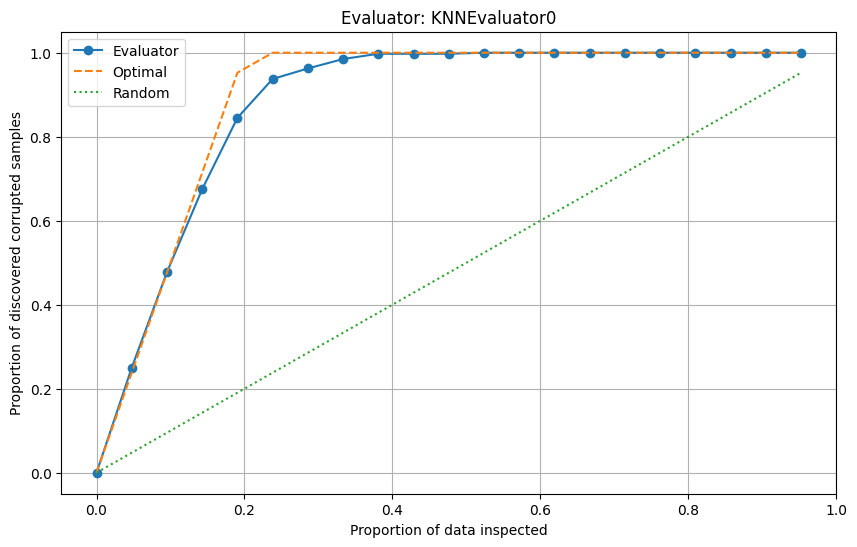

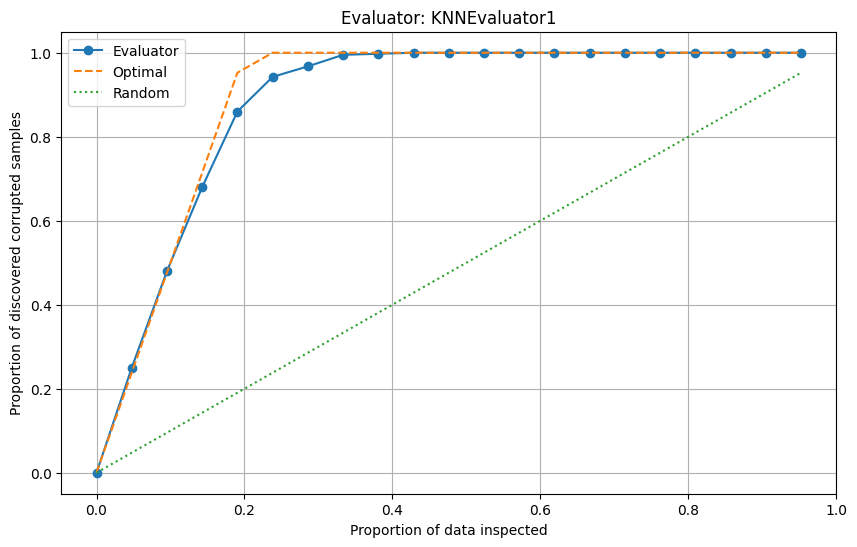

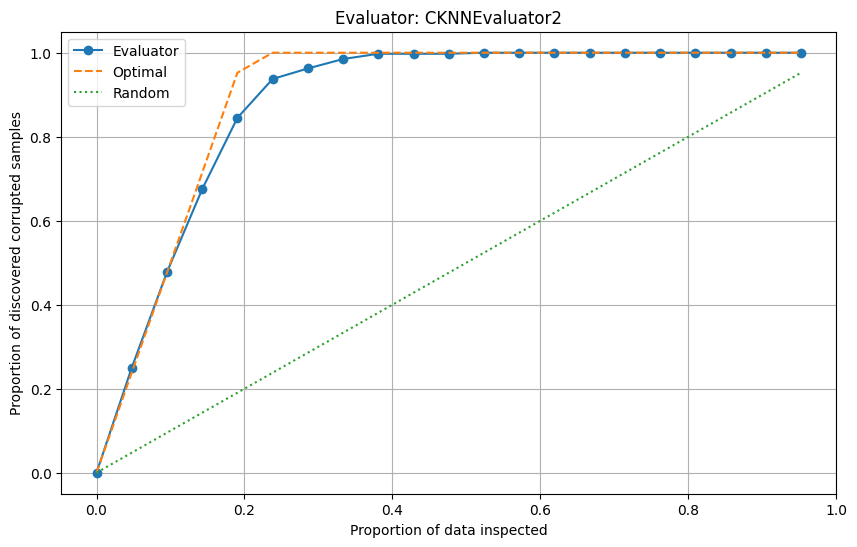

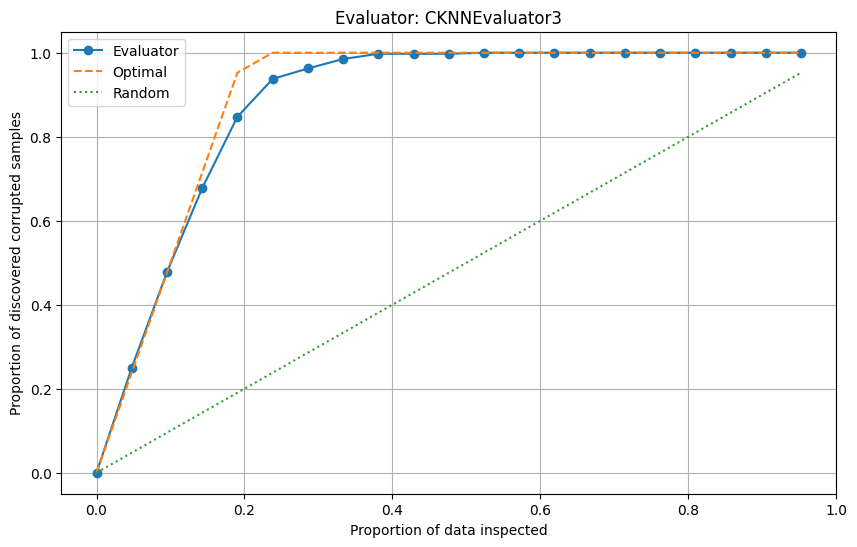

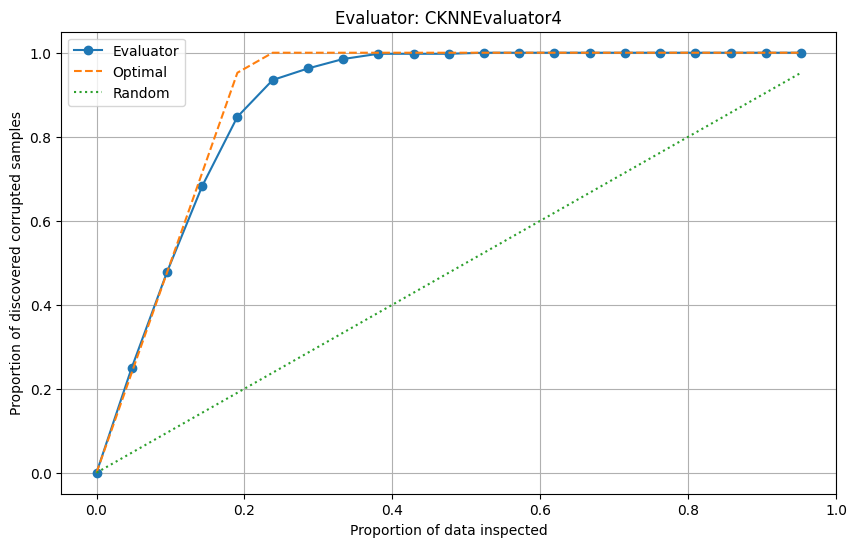

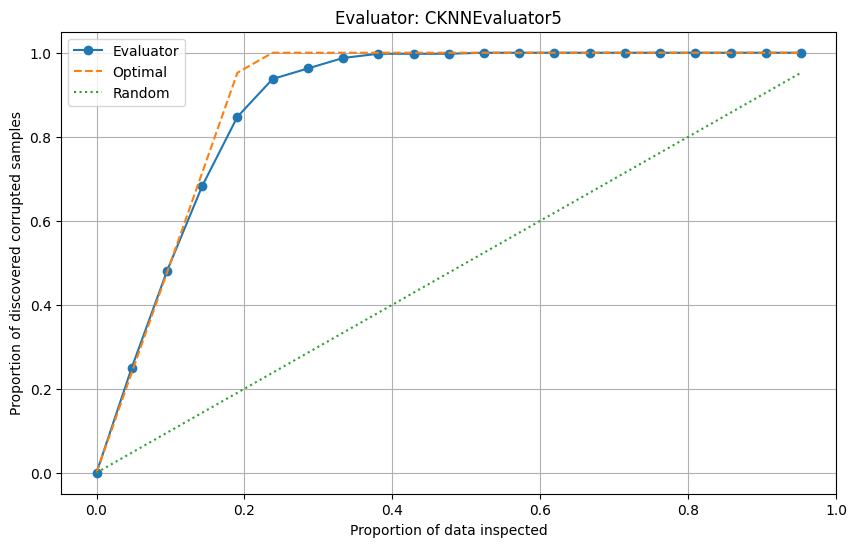

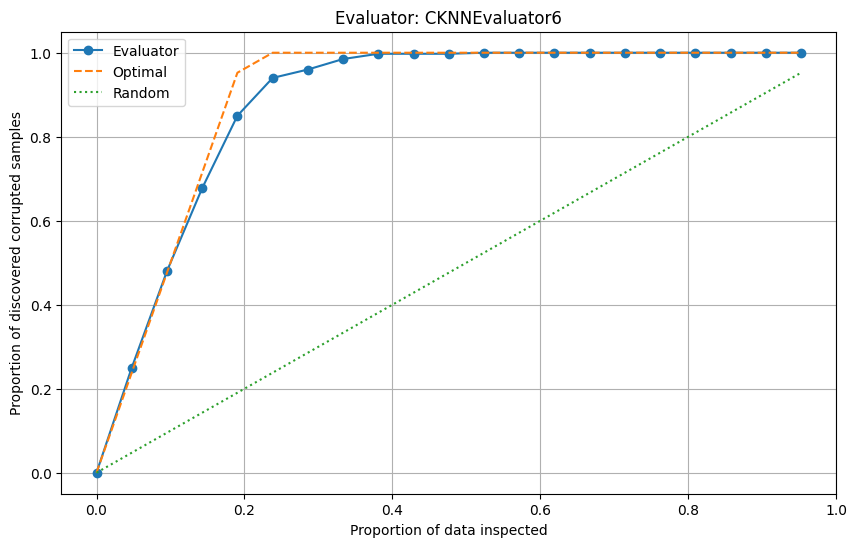

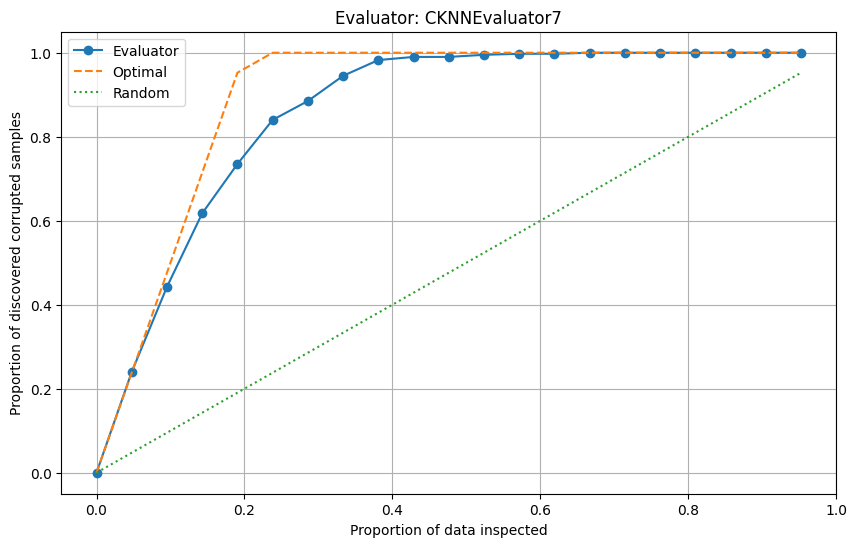

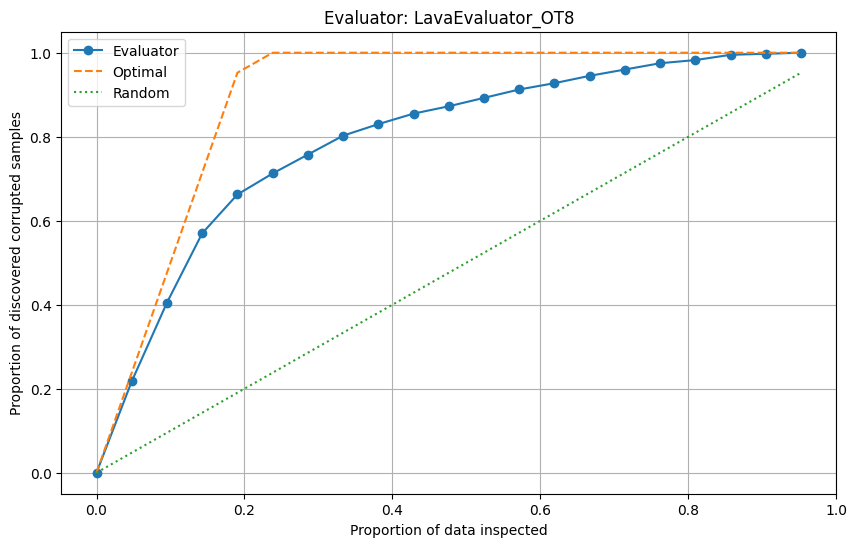

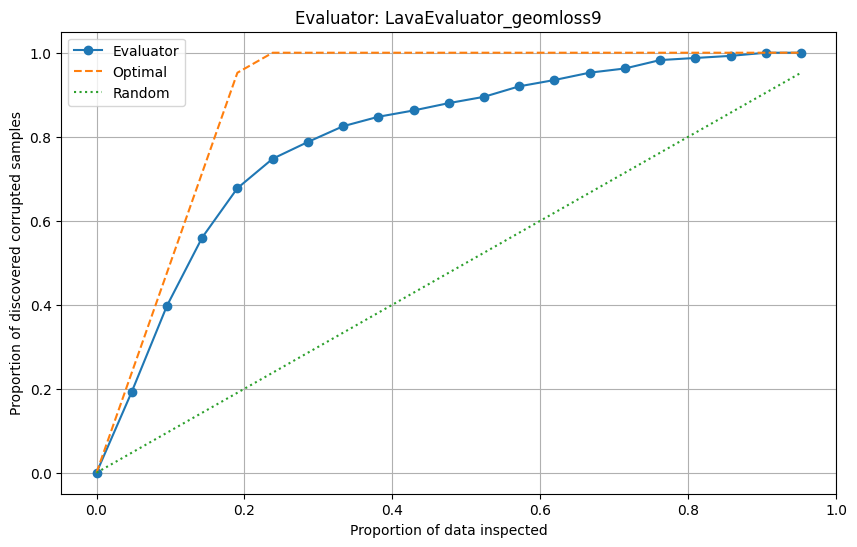

{'KNNEvaluator0': {'found_rates': [0.0,
   0.25,
   0.4775,
   0.675,
   0.845,
   0.9375,
   0.9625,
   0.985,
   0.9975,
   0.9975,
   0.9975,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'KNNEvaluator1': {'found_rates': [0.0,
   0.25,
   0.48,
   0.68,
   0.86,
   0.9425,
   0.9675,
   0.995,
   0.9975,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.1

In [15]:
from base_evaluator import BaseEvaluator, KNNEvaluator,CKNNEvaluator ,LavaEvaluator_geomloss, LavaEvaluator_OT, ExperimentRunner, LavaEvaluator_batch, LavaEvaluator_batchl2l
knn_evaluator1 = KNNEvaluator(Ismetric=0)
knn_evaluator2 = KNNEvaluator(Ismetric=1)
cknn_evaluator1 = CKNNEvaluator(T = 20, default=False)
cknn_evaluator2 = CKNNEvaluator(T = 100, default=False)
cknn_evaluator3 = CKNNEvaluator(T = 500, default=False)
cknn_evaluator4 = CKNNEvaluator(T = 1000, default=False)
cknn_evaluator5 = CKNNEvaluator(T = 1500, default=False)
cknn_evaluator6 = CKNNEvaluator(T = 1980, default=False)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()
experiment = ExperimentRunner(evaluators=[knn_evaluator1, knn_evaluator2, cknn_evaluator1, cknn_evaluator2, cknn_evaluator3, cknn_evaluator4, cknn_evaluator5, cknn_evaluator6,  lava_evaluator_OT, lava_evaluator_geomloss])
results = experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [16]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.2) # newww

KNNEvaluator0: {'F1-model': np.float64(0.8406212568570839), 'Precision': 0.845, 'Recall': 0.845, 'F1-Score': 0.845}
KNNEvaluator1: {'F1-model': np.float64(0.8426298446570522), 'Precision': 0.86, 'Recall': 0.86, 'F1-Score': 0.8599999999999999}
CKNNEvaluator2: {'F1-model': np.float64(0.8406212568570839), 'Precision': 0.845, 'Recall': 0.845, 'F1-Score': 0.845}
CKNNEvaluator3: {'F1-model': np.float64(0.8414601851104081), 'Precision': 0.8475, 'Recall': 0.8475, 'F1-Score': 0.8475}
CKNNEvaluator4: {'F1-model': np.float64(0.8406329981102294), 'Precision': 0.8475, 'Recall': 0.8475, 'F1-Score': 0.8475}
CKNNEvaluator5: {'F1-model': np.float64(0.8406329981102294), 'Precision': 0.8475, 'Recall': 0.8475, 'F1-Score': 0.8475}
CKNNEvaluator6: {'F1-model': np.float64(0.8406212568570839), 'Precision': 0.85, 'Recall': 0.85, 'F1-Score': 0.85}
CKNNEvaluator7: {'F1-model': np.float64(0.8442034343158081), 'Precision': 0.735, 'Recall': 0.735, 'F1-Score': 0.735}
LavaEvaluator_OT8: {'F1-model': np.float64(0.8335

{'KNNEvaluator0': {'F1-model': np.float64(0.8406212568570839),
  'Precision': 0.845,
  'Recall': 0.845,
  'F1-Score': 0.845},
 'KNNEvaluator1': {'F1-model': np.float64(0.8426298446570522),
  'Precision': 0.86,
  'Recall': 0.86,
  'F1-Score': 0.8599999999999999},
 'CKNNEvaluator2': {'F1-model': np.float64(0.8406212568570839),
  'Precision': 0.845,
  'Recall': 0.845,
  'F1-Score': 0.845},
 'CKNNEvaluator3': {'F1-model': np.float64(0.8414601851104081),
  'Precision': 0.8475,
  'Recall': 0.8475,
  'F1-Score': 0.8475},
 'CKNNEvaluator4': {'F1-model': np.float64(0.8406329981102294),
  'Precision': 0.8475,
  'Recall': 0.8475,
  'F1-Score': 0.8475},
 'CKNNEvaluator5': {'F1-model': np.float64(0.8406329981102294),
  'Precision': 0.8475,
  'Recall': 0.8475,
  'F1-Score': 0.8475},
 'CKNNEvaluator6': {'F1-model': np.float64(0.8406212568570839),
  'Precision': 0.85,
  'Recall': 0.85,
  'F1-Score': 0.85},
 'CKNNEvaluator7': {'F1-model': np.float64(0.8442034343158081),
  'Precision': 0.735,
  'Recall'

In [17]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.3) # newww

KNNEvaluator0: {'F1-model': np.float64(0.842675035189165), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
KNNEvaluator1: {'F1-model': np.float64(0.8415342178473892), 'Precision': 0.645, 'Recall': 0.9675, 'F1-Score': 0.774}
CKNNEvaluator2: {'F1-model': np.float64(0.842675035189165), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
CKNNEvaluator3: {'F1-model': np.float64(0.842675035189165), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
CKNNEvaluator4: {'F1-model': np.float64(0.8436611142761627), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
CKNNEvaluator5: {'F1-model': np.float64(0.8424906031162346), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
CKNNEvaluator6: {'F1-model': np.float64(0.8436457523658133), 'Precision': 0.64, 'Recall': 0.96, 'F1-Score': 0.7679999999999999}
CKNNEvaluator7: {'F1-model': np.float64(0.8418810340010575), 'Precision': 0.59, 'Recall': 0.885, 'F1-Score': 

{'KNNEvaluator0': {'F1-model': np.float64(0.842675035189165),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'KNNEvaluator1': {'F1-model': np.float64(0.8415342178473892),
  'Precision': 0.645,
  'Recall': 0.9675,
  'F1-Score': 0.774},
 'CKNNEvaluator2': {'F1-model': np.float64(0.842675035189165),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'CKNNEvaluator3': {'F1-model': np.float64(0.842675035189165),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'CKNNEvaluator4': {'F1-model': np.float64(0.8436611142761627),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'CKNNEvaluator5': {'F1-model': np.float64(0.8424906031162346),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'CKNNEvaluator6': {'F1-model': np.float64(0.8436457523658133),
  'Precision': 0.64,
  'Recall': 0.96,
  'F1-Score': 0.7679999999999999},
 'CKNNEvaluator7': {'F1-model': np.floa

Running evaluator: KNNEvaluator0


100%|██████████| 1999/1999 [00:00<00:00, 2154.43it/s]


KNNEvaluator0 completed in 2.22 seconds.
Running evaluator: KNNEvaluator1


100%|██████████| 1999/1999 [00:00<00:00, 2172.63it/s]


KNNEvaluator1 completed in 1.79 seconds.
Running evaluator: CKNNEvaluator2


100%|██████████| 1000/1000 [00:00<00:00, 2391.49it/s]


CKNNEvaluator2 completed in 1.53 seconds.
Running evaluator: LavaEvaluator_batch3


batch LAVA:   0%|          | 0/4 [00:00<?, ?it/s]







d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(







batch LAVA:  25%|██▌       | 1/4 [00:00<00:02,  1.03it/s]













batch LAVA:  50%|█████     | 2/4 [00:01<00:01,  1.24it/s]













batch LAVA:  75%|███████▌  | 3/4 [00:02<00:00,  1.24it/s]













batch LAVA: 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


LavaEvaluator_batch3 completed in 3.19 seconds.
Running evaluator: LavaEvaluator_batchl2l4


batch LAVA: 100%|██████████| 63/63 [03:28<00:00,  3.32s/it]


LavaEvaluator_batchl2l4 completed in 209.47 seconds.
Running evaluator: LavaEvaluator_batchl2l5


batch LAVA: 100%|██████████| 32/32 [01:01<00:00,  1.92s/it]


LavaEvaluator_batchl2l5 completed in 61.93 seconds.
Running evaluator: LavaEvaluator_batchl2l6


batch LAVA: 100%|██████████| 16/16 [00:15<00:00,  1.05it/s]


LavaEvaluator_batchl2l6 completed in 15.83 seconds.
Running evaluator: LavaEvaluator_batchl2l7


batch LAVA: 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]


LavaEvaluator_batchl2l7 completed in 4.01 seconds.
Running evaluator: LavaEvaluator_batchl2l8


batch LAVA: 100%|██████████| 4/4 [00:00<00:00,  4.19it/s]


LavaEvaluator_batchl2l8 completed in 1.42 seconds.
Running evaluator: LavaEvaluator_batchl2l9


batch LAVA: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


LavaEvaluator_batchl2l9 completed in 1.18 seconds.
Running evaluator: LavaEvaluator_OT10


LavaEvaluator_OT10 completed in 0.86 seconds.
Running evaluator: LavaEvaluator_geomloss11


LavaEvaluator_geomloss11 completed in 2.40 seconds.


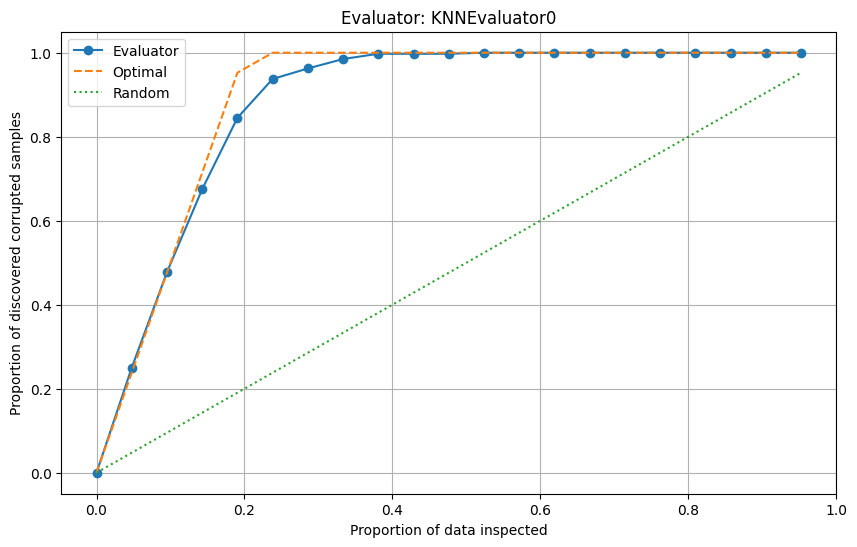

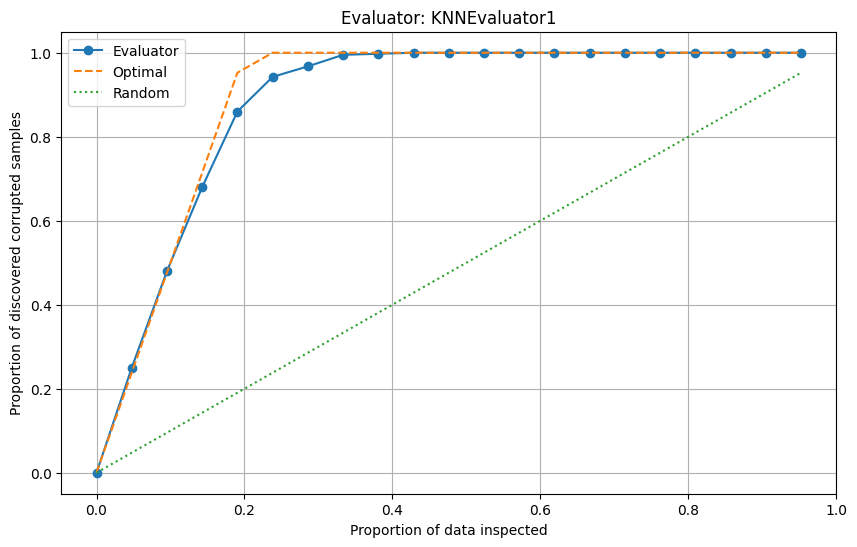

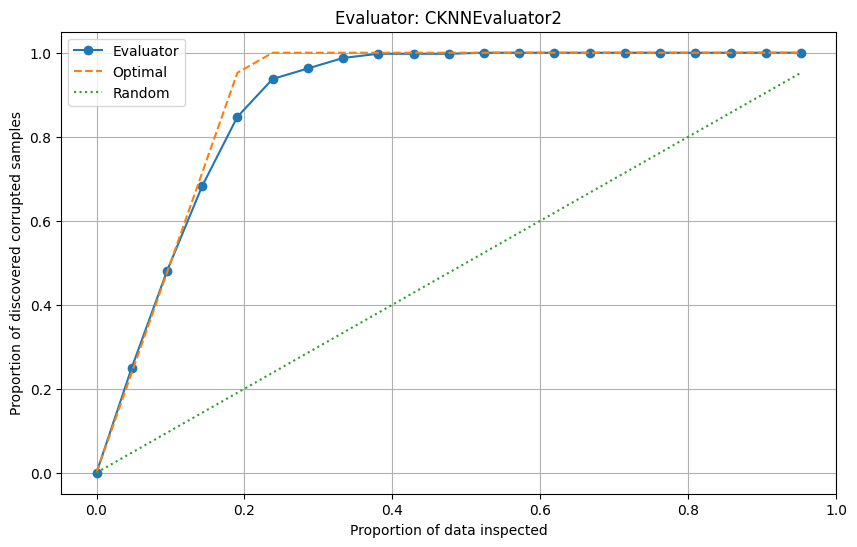

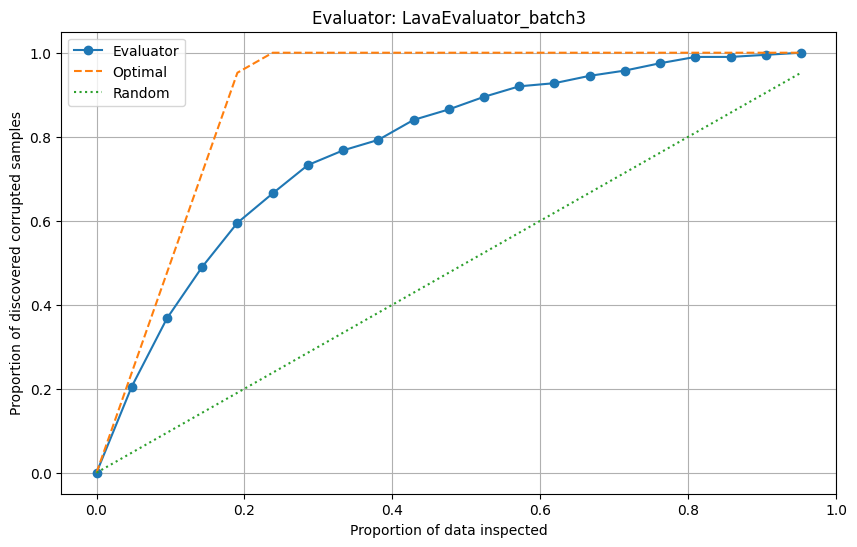

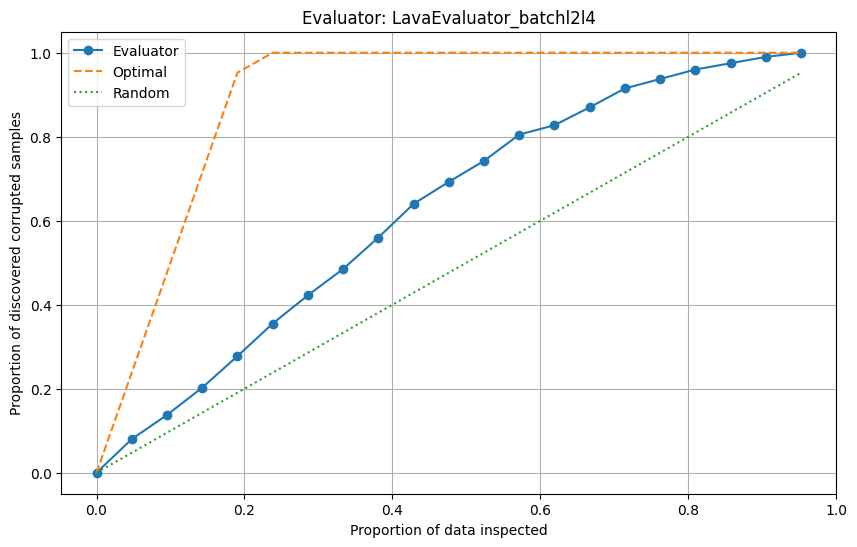

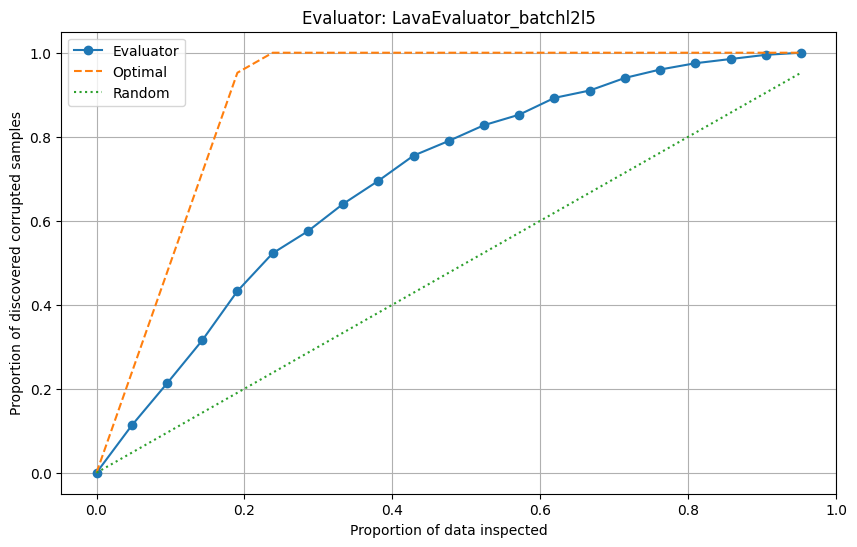

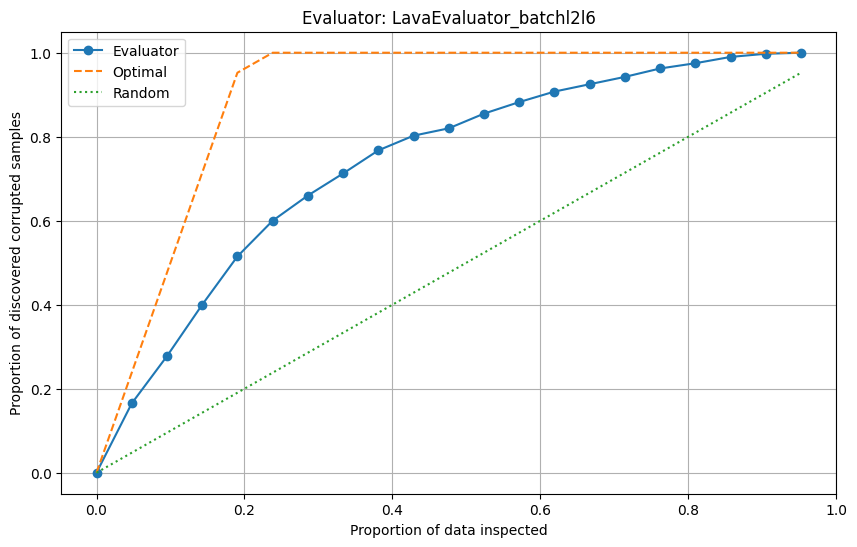

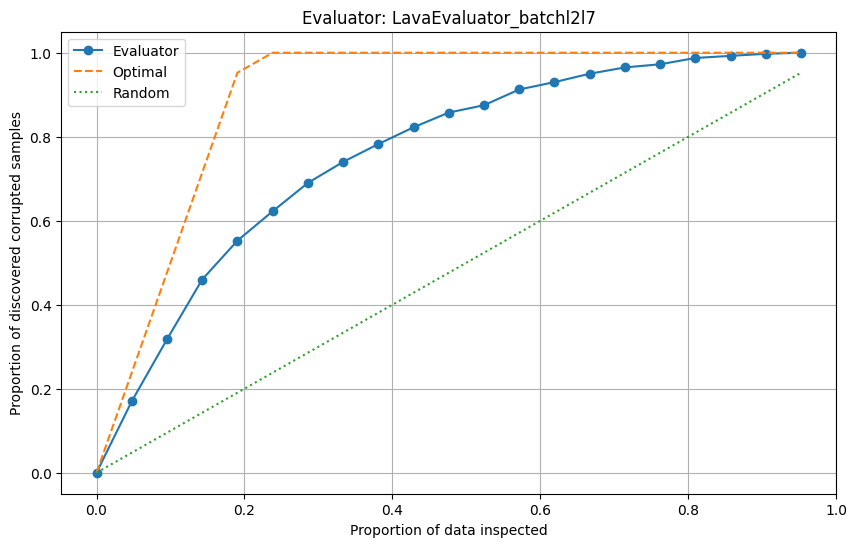

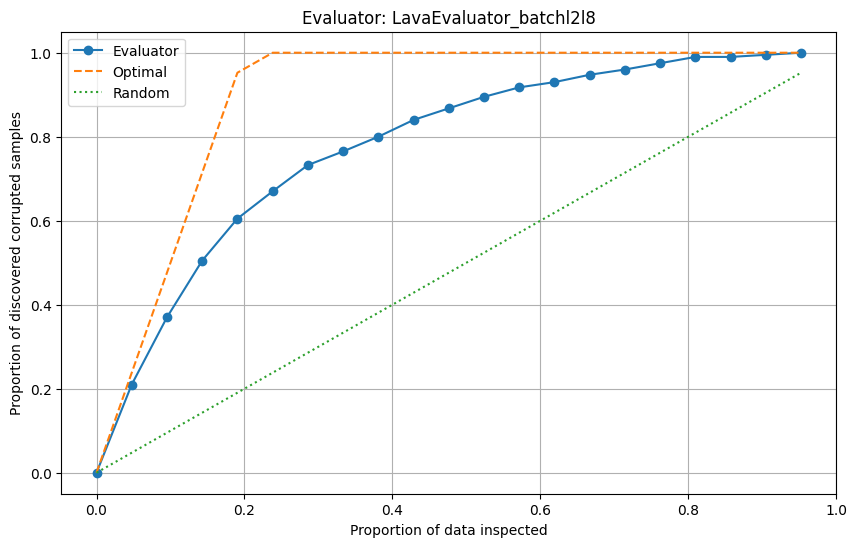

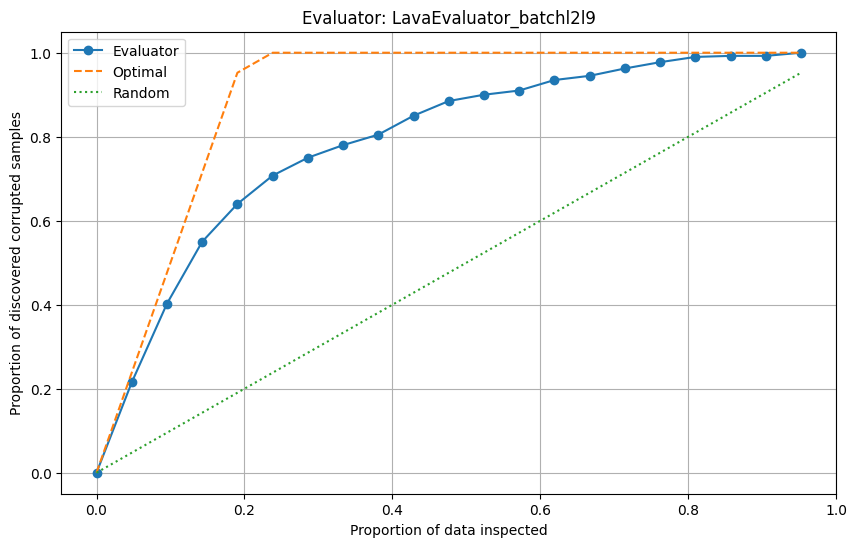

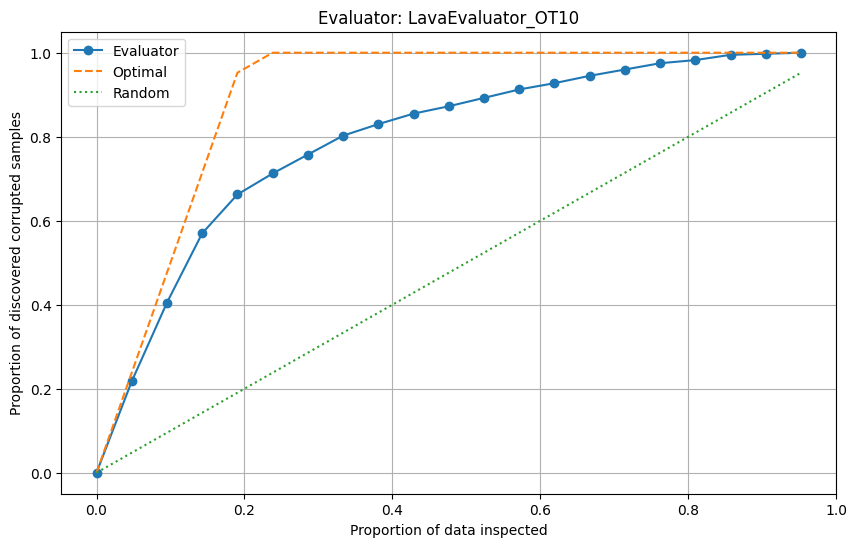

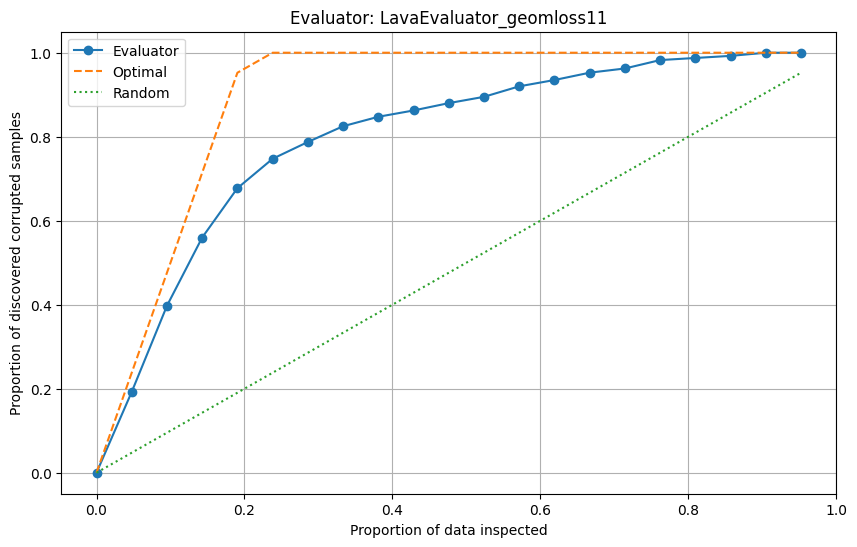

{'KNNEvaluator0': {'found_rates': [0.0,
   0.25,
   0.4775,
   0.675,
   0.845,
   0.9375,
   0.9625,
   0.985,
   0.9975,
   0.9975,
   0.9975,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'KNNEvaluator1': {'found_rates': [0.0,
   0.25,
   0.48,
   0.68,
   0.86,
   0.9425,
   0.9675,
   0.995,
   0.9975,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.1

In [18]:
from base_evaluator import BaseEvaluator, KNNEvaluator,CKNNEvaluator ,LavaEvaluator_geomloss, LavaEvaluator_OT, ExperimentRunner, LavaEvaluator_batch, LavaEvaluator_batchl2l
knn_evaluator1 = KNNEvaluator(Ismetric=0)
knn_evaluator2 = KNNEvaluator(Ismetric=1)
cknn_evaluator2 = CKNNEvaluator(T = 1000, default=False)
lava_evaluator_batch1 = LavaEvaluator_batch(batch = 512)
lava_evaluator_batchl2l1 = LavaEvaluator_batchl2l(batch = 32)
lava_evaluator_batchl2l2 = LavaEvaluator_batchl2l(batch = 64)
lava_evaluator_batchl2l3 = LavaEvaluator_batchl2l(batch = 128)
lava_evaluator_batchl2l4 = LavaEvaluator_batchl2l(batch = 256)
lava_evaluator_batchl2l5 = LavaEvaluator_batchl2l(batch = 512)
lava_evaluator_batchl2l6 = LavaEvaluator_batchl2l(batch = 1024)
lava_evaluator_OT = LavaEvaluator_OT()
lava_evaluator_geomloss = LavaEvaluator_geomloss()
experiment = ExperimentRunner(evaluators=[knn_evaluator1, knn_evaluator2, cknn_evaluator2, lava_evaluator_batch1, lava_evaluator_batchl2l1, lava_evaluator_batchl2l2, lava_evaluator_batchl2l3, lava_evaluator_batchl2l4, lava_evaluator_batchl2l5, lava_evaluator_batchl2l6, lava_evaluator_OT, lava_evaluator_geomloss])
results = experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [13]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.2) # newww

KNNEvaluator0: {'F1-model': np.float64(0.8406212568570839), 'Precision': 0.845, 'Recall': 0.845, 'F1-Score': 0.845}
KNNEvaluator1: {'F1-model': np.float64(0.8426298446570522), 'Precision': 0.86, 'Recall': 0.86, 'F1-Score': 0.8599999999999999}
CKNNEvaluator2: {'F1-model': np.float64(0.8406329981102294), 'Precision': 0.8475, 'Recall': 0.8475, 'F1-Score': 0.8475}
LavaEvaluator_batch3: {'F1-model': np.float64(0.8346315674130196), 'Precision': 0.595, 'Recall': 0.595, 'F1-Score': 0.595}
LavaEvaluator_batchl2l4: {'F1-model': np.float64(0.8377442713535013), 'Precision': 0.2775, 'Recall': 0.2775, 'F1-Score': 0.2775}
LavaEvaluator_batchl2l5: {'F1-model': np.float64(0.8355365283264694), 'Precision': 0.4325, 'Recall': 0.4325, 'F1-Score': 0.4325}
LavaEvaluator_batchl2l6: {'F1-model': np.float64(0.8367484742725482), 'Precision': 0.515, 'Recall': 0.515, 'F1-Score': 0.515}
LavaEvaluator_batchl2l7: {'F1-model': np.float64(0.8368670013467719), 'Precision': 0.5525, 'Recall': 0.5525, 'F1-Score': 0.5525}
L

{'KNNEvaluator0': {'F1-model': np.float64(0.8406212568570839),
  'Precision': 0.845,
  'Recall': 0.845,
  'F1-Score': 0.845},
 'KNNEvaluator1': {'F1-model': np.float64(0.8426298446570522),
  'Precision': 0.86,
  'Recall': 0.86,
  'F1-Score': 0.8599999999999999},
 'CKNNEvaluator2': {'F1-model': np.float64(0.8406329981102294),
  'Precision': 0.8475,
  'Recall': 0.8475,
  'F1-Score': 0.8475},
 'LavaEvaluator_batch3': {'F1-model': np.float64(0.8346315674130196),
  'Precision': 0.595,
  'Recall': 0.595,
  'F1-Score': 0.595},
 'LavaEvaluator_batchl2l4': {'F1-model': np.float64(0.8377442713535013),
  'Precision': 0.2775,
  'Recall': 0.2775,
  'F1-Score': 0.2775},
 'LavaEvaluator_batchl2l5': {'F1-model': np.float64(0.8355365283264694),
  'Precision': 0.4325,
  'Recall': 0.4325,
  'F1-Score': 0.4325},
 'LavaEvaluator_batchl2l6': {'F1-model': np.float64(0.8367484742725482),
  'Precision': 0.515,
  'Recall': 0.515,
  'F1-Score': 0.515},
 'LavaEvaluator_batchl2l7': {'F1-model': np.float64(0.836867

In [19]:
experiment.calculate_label_noise_20(model, noisy_train_indices, 0.3) # newwave

KNNEvaluator0: {'F1-model': np.float64(0.842675035189165), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
KNNEvaluator1: {'F1-model': np.float64(0.8415342178473892), 'Precision': 0.645, 'Recall': 0.9675, 'F1-Score': 0.774}
CKNNEvaluator2: {'F1-model': np.float64(0.8424906031162346), 'Precision': 0.6416666666666667, 'Recall': 0.9625, 'F1-Score': 0.77}
LavaEvaluator_batch3: {'F1-model': np.float64(0.8339416236644137), 'Precision': 0.48833333333333334, 'Recall': 0.7325, 'F1-Score': 0.5860000000000001}
LavaEvaluator_batchl2l4: {'F1-model': np.float64(0.8349058642729226), 'Precision': 0.2816666666666667, 'Recall': 0.4225, 'F1-Score': 0.338}
LavaEvaluator_batchl2l5: {'F1-model': np.float64(0.8366045341945441), 'Precision': 0.38333333333333336, 'Recall': 0.575, 'F1-Score': 0.4600000000000001}
LavaEvaluator_batchl2l6: {'F1-model': np.float64(0.8387466692395638), 'Precision': 0.44, 'Recall': 0.66, 'F1-Score': 0.5279999999999999}
LavaEvaluator_batchl2l7: {'F1-model': np.flo

{'KNNEvaluator0': {'F1-model': np.float64(0.842675035189165),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'KNNEvaluator1': {'F1-model': np.float64(0.8415342178473892),
  'Precision': 0.645,
  'Recall': 0.9675,
  'F1-Score': 0.774},
 'CKNNEvaluator2': {'F1-model': np.float64(0.8424906031162346),
  'Precision': 0.6416666666666667,
  'Recall': 0.9625,
  'F1-Score': 0.77},
 'LavaEvaluator_batch3': {'F1-model': np.float64(0.8339416236644137),
  'Precision': 0.48833333333333334,
  'Recall': 0.7325,
  'F1-Score': 0.5860000000000001},
 'LavaEvaluator_batchl2l4': {'F1-model': np.float64(0.8349058642729226),
  'Precision': 0.2816666666666667,
  'Recall': 0.4225,
  'F1-Score': 0.338},
 'LavaEvaluator_batchl2l5': {'F1-model': np.float64(0.8366045341945441),
  'Precision': 0.38333333333333336,
  'Recall': 0.575,
  'F1-Score': 0.4600000000000001},
 'LavaEvaluator_batchl2l6': {'F1-model': np.float64(0.8387466692395638),
  'Precision': 0.44,
  'Recall': 0.66,
  'F1-Sco

Running remove_low experiment...
position: 0
position: 180
position: 360
position: 540
position: 720


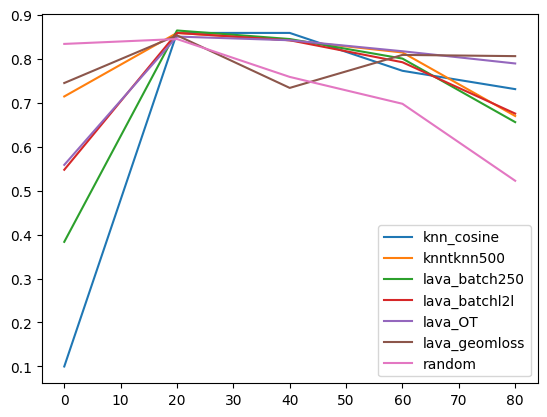

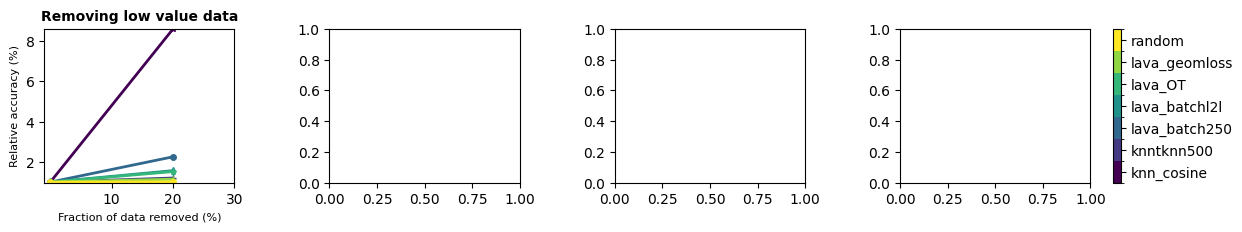

In [ ]:
from experiment_run import run_experiments
seed = 20
np.random.seed(seed)
rand_lst = []
shap_list = [value for value in results.values()]
rand_lst.append(np.random.rand(len(shap_list[0])))
name = ['knn_cosine', 'knn' 'tknn500' , 'lava_batch250', 'lava_batchl2l', 'lava_OT', 'lava_geomloss', 'random']
model = LogisticRegression(input_dim, num_classes)
values = [shap_list[0], shap_list[1], shap_list[2], shap_list[3] , shap_list[4], shap_list[5], shap_list[6], rand_lst[0]]
run_experiments(values, name, x_embeddings, y_labels_noisy, xt_embeddings, yt_labels, model, plot_every_percentage=0.2)